#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Personal Loan Campaign 
##### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Additional Project

### by Anthony Amabile
This model is to help the marketing department of My Bank to identify the potential depositor (liability) customers who also have a life insurance policy, who have a higher probability of purchasing a loan (and becoming asset customers). This purpose of this model is to have better targeting of potential customers than the last campaign which had a conversion rate of 12.56%.

Specifically, this model sets out to acheive the following objectives:
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant for making predictions.
- Which segment of customers should be targeted more.

In [909]:

%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
today = datetime.now()

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [910]:
os.chdir('/Users/Tony/Documents/Texas Austin AI ML/Supervised Learning Classification/Makeup Project')
os.getcwd()

'c:\\Users\\Tony\\Documents\\Texas Austin AI ML\\Supervised Learning Classification\\Makeup Project'

<IPython.core.display.Javascript object>

In [911]:
data = pd.read_csv('My Bank.csv')
df = data.copy()
df.sample(10, random_state=1)

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
11456,C18883,1,48,M,233540.97,PROF,405,8,CA,07-03-2013,47,50,5,2,6,1,6,0,47200,113200,720080,497413.0,85857,0,1,1
16528,C643,0,54,F,1064297.55,PROF,161,20,SA,06-01-2014,36,5,2,0,0,0,2,1,0,683790,68700,0.0,0,0,1,0
3253,C10264,0,34,M,233929.43,PROF,274,11,SA,05-10-2003,169,16,3,2,4,1,4,0,5400,322680,666080,371981.0,108239,0,1,1
18614,C13005,1,31,M,696006.05,SELF-EMP,205,17,SA,08-04-1999,214,8,0,1,1,0,4,1,14700,0,79690,493445.0,0,0,1,0
1544,C14862,0,51,F,31690.72,SENP,310,4,CA,05-10-2003,169,9,2,1,0,1,5,0,8600,484620,76820,0.0,158915,0,1,1
12568,C18208,0,25,F,699224.12,PROF,304,1,SA,07-07-2008,107,10,2,1,1,0,1,1,10200,413860,0,835426.0,0,0,1,1
15497,C2986,0,34,M,871741.51,SELF-EMP,422,14,SA,09-01-2001,189,6,1,1,0,0,4,0,7400,183180,55250,0.0,0,0,1,1
13987,C9391,0,37,F,971909.99,SENP,242,15,SA,1/20/2002,184,10,2,1,1,0,1,0,1100,203420,0,289898.0,0,0,1,0
9598,C12506,1,31,O,24854.97,PROF,150,16,CA,5/31/2013,48,22,1,0,0,0,0,0,0,391570,0,0.0,0,0,0,1
6668,C19189,0,52,F,185666.98,SENP,183,4,SA,2/17/2001,196,14,4,1,1,0,1,0,14300,73990,0,923474.0,0,0,1,1


<IPython.core.display.Javascript object>

In [912]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the original dataset.')

There are 20000 rows and 26 columns in the original dataset.


<IPython.core.display.Javascript object>

In [913]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   SCR                       20000 non-null  int64  
 7   HOLDING_PERIOD            20000 non-null  int64  
 8   ACC_TYPE                  20000 non-null  object 
 9   ACC_OP_DATE               20000 non-null  object 
 10  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 11  NO_OF_L_CR_TXNS           20000 non-null  int64  
 12  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64  
 13  NO_OF_ATM_DR_TXNS         20000 non-null  int64  
 14  NO_OF_

<IPython.core.display.Javascript object>

In [914]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

Most of the data is nicely formatted, no null and no duplicate values. Most of the columns are numeric, only two of which are float (BALANCE and AMT_NET_DR), the rest of the columns are already formatted as integers. We will convert both of these columns to intergers. The ACC_OP_DATE is a date but formatted as text. It also has a couple different formatting of the date. We will clean this column up so it is probably formatted as a date and we can do feature engineering to get the age of the account based on this date.

In addition, the string attribute columns of gender, occupation and account type will need to be converted to dummy columns. We will revisit this when building our model.

In [915]:
#converting the account opening date field to the more meaningful account age field
df['ACC_OP_DATE'] = pd.to_datetime(df['ACC_OP_DATE'])
df['Account_Age']= (today - df['ACC_OP_DATE'])/ np.timedelta64(1, 'Y')
df['Account_Age']= df['Account_Age'].round().astype(int)
#dropping the date column
df.drop(columns=['ACC_OP_DATE'], inplace=True)

#converting the other float columns to integers
df['BALANCE']= df['BALANCE'].round().astype(int)
df['AMT_NET_DR']= df['AMT_NET_DR'].round().astype(int)

<IPython.core.display.Javascript object>

In [916]:
df.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,Account_Age
0,C7927,0,27,M,3384,SELF-EMP,776,30,SA,146,7,0,1,2,0,0,0,13100,0,0,973557,0,0,1,1,17
1,C6877,0,47,M,287489,SAL,324,28,SA,104,8,0,1,1,0,0,0,6600,0,0,799813,0,1,1,0,13
2,C19922,0,40,M,18217,SELF-EMP,603,2,SA,61,10,1,1,1,0,2,0,11200,561120,49320,997570,0,1,1,1,10
3,C8183,0,53,M,71720,SAL,196,13,CA,107,36,4,2,3,1,4,0,26100,673590,60780,741506,71388,0,1,0,14
4,C12123,0,36,M,1671623,PROF,167,24,SA,185,20,1,0,0,0,0,0,0,808480,0,0,0,0,1,0,20


<IPython.core.display.Javascript object>

In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CUST_ID                   20000 non-null  object
 1   TARGET                    20000 non-null  int64 
 2   AGE                       20000 non-null  int64 
 3   GENDER                    20000 non-null  object
 4   BALANCE                   20000 non-null  int32 
 5   OCCUPATION                20000 non-null  object
 6   SCR                       20000 non-null  int64 
 7   HOLDING_PERIOD            20000 non-null  int64 
 8   ACC_TYPE                  20000 non-null  object
 9   LEN_OF_RLTN_IN_MNTH       20000 non-null  int64 
 10  NO_OF_L_CR_TXNS           20000 non-null  int64 
 11  NO_OF_BR_CSH_WDL_DR_TXNS  20000 non-null  int64 
 12  NO_OF_ATM_DR_TXNS         20000 non-null  int64 
 13  NO_OF_NET_DR_TXNS         20000 non-null  int64 
 14  NO_OF_MOB_DR_TXNS     

<IPython.core.display.Javascript object>

In [918]:
df.groupby('GENDER').size()

GENDER
F     5433
M    14376
O      191
dtype: int64

<IPython.core.display.Javascript object>

In [919]:
df = df[df.GENDER != 'O']

<IPython.core.display.Javascript object>

In [920]:
df.shape

(19809, 26)

<IPython.core.display.Javascript object>

In [921]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

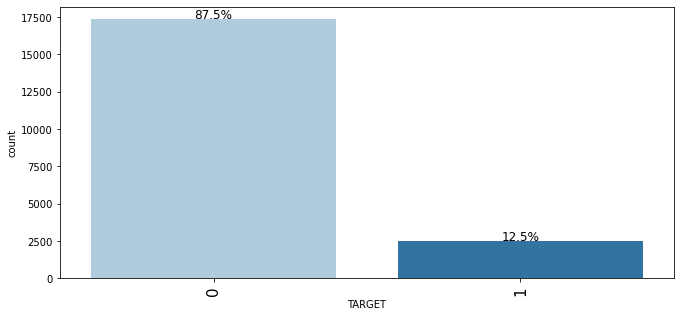

<IPython.core.display.Javascript object>

In [922]:
labeled_barplot(df, 'TARGET', perc=True, n=10)

In [923]:
df.groupby('TARGET').size()

TARGET
0    17339
1     2470
dtype: int64

<IPython.core.display.Javascript object>

Only 2,512 customers (12.6%) in the data set accepted personal loan in the last campaign. 

In [924]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Account_Age                 0
FLG_HAS_OLD_LOAN            0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
FLG_HAS_ANY_CHGS            0
FLG_HAS_NOMINEE             0
CUST_ID                     0
dtype: int64

<IPython.core.display.Javascript object>

No Columns have missing values.

In [925]:
df.nunique()

CUST_ID                     19809
TARGET                          2
AGE                            35
GENDER                          2
BALANCE                      9756
OCCUPATION                      4
SCR                           896
HOLDING_PERIOD                 31
ACC_TYPE                        2
LEN_OF_RLTN_IN_MNTH           193
NO_OF_L_CR_TXNS                76
NO_OF_BR_CSH_WDL_DR_TXNS       16
NO_OF_ATM_DR_TXNS              25
NO_OF_NET_DR_TXNS              17
NO_OF_MOB_DR_TXNS               6
NO_OF_CHQ_DR_TXNS              16
FLG_HAS_CC                      2
AMT_ATM_DR                    638
AMT_BR_CSH_WDL_DR            7307
AMT_CHQ_DR                   4838
AMT_NET_DR                   4789
AMT_MOB_DR                   2248
FLG_HAS_ANY_CHGS                2
FLG_HAS_NOMINEE                 2
FLG_HAS_OLD_LOAN                2
Account_Age                    17
dtype: int64

<IPython.core.display.Javascript object>

In [926]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,19809.0,0.124691,0.330376,0.0,0.0,0.0,0.0,1.0
AGE,19809.0,38.412186,9.579206,21.0,30.0,38.0,46.0,55.0
BALANCE,19809.0,511172.790954,717946.154101,0.0,65851.0,232819.0,657299.0,8360431.0
SCR,19809.0,439.629310,250.031714,100.0,227.0,364.0,644.0,999.0
HOLDING_PERIOD,19809.0,14.964461,8.645291,1.0,7.0,15.0,22.0,31.0
LEN_OF_RLTN_IN_MNTH,19809.0,125.254783,54.962274,29.0,79.0,125.0,172.0,221.0
NO_OF_L_CR_TXNS,19809.0,12.114493,11.828546,0.0,6.0,9.0,14.0,75.0
NO_OF_BR_CSH_WDL_DR_TXNS,19809.0,1.866323,2.236858,0.0,1.0,1.0,2.0,15.0
NO_OF_ATM_DR_TXNS,19809.0,1.017063,1.459057,0.0,0.0,1.0,1.0,25.0
NO_OF_NET_DR_TXNS,19809.0,1.143117,2.338625,0.0,0.0,0.0,1.0,22.0


<IPython.core.display.Javascript object>

Observations
1. There are 20,000 customers in our data set.  
2. The median monthly average balance for customers in the data set is $231,676. The highest monthly average balance is $8,360,431 and the lowest is $0.
3. The median marketing score of customers in the data is 364. 
4. The median account is 15 years old, with the minimum account being 7 years old.
5. The median duration in days to hold the money (holding period) for customers in the data set is 15.
6. The median number of credit transation is 10.
7. The median number of branch cash withdrawls is 1 with a max of 75.
8. The median number of ATM debit transactions is 1 with a max of 15.
9. The median number of net banking debit transations is 0 with a max of 22.
10. The typical age of customers is 38.
11. The median number of mobile banking debit transations is 0 with a max of 25.
12. The median number of check debit transations is 2 with a max of 15.
13. Only 30% of the customers have a credit card. 
14. The median amount withdrawn from ATMs is $6,900 with a max of $199,300.
15. The median amount withdrawn from branches is $340,150 with a max of $999,930.
16. The median amount debited by check transactions is $23,840 with a max of $4,928,640.
17. The median amount debited by net transactions is $0 with a max of $999,854.
18. The median amount debited by mobile transactions is $0 with a max of $199,667.
19. Only 11% of the customers have any banking charges. 
20. 90% of the customers have a nominee. 
21. Roughly half of the customers have an old loan. 

The typical customer didn't accept the personal loan from the last campaign, doesn't use mobile or online banking often and primarily uses checks. The typical customer also doesn't take many withdrawls from the brank or the ATM but the withdrawls with the highest value typically occur at a branch. The typical customer has a well-established relationship with the bank. Only roughly a third of customers have a credit card, only about 1 in 10 customers have any banking charges, and roughly half have an old loan. Most all customers have a nominee.



In [927]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

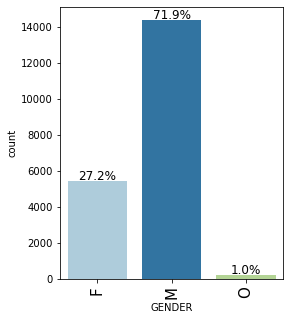

<IPython.core.display.Javascript object>

In [928]:
labeled_barplot(data, "GENDER", perc=True)

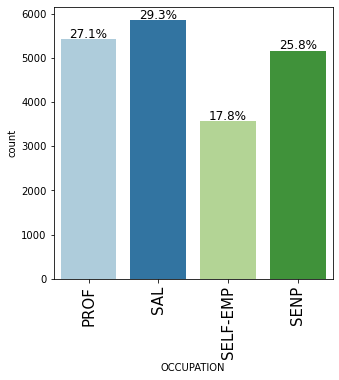

<IPython.core.display.Javascript object>

In [929]:
labeled_barplot(data, "OCCUPATION", perc=True)

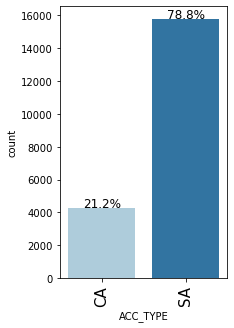

<IPython.core.display.Javascript object>

In [930]:
labeled_barplot(data, "ACC_TYPE", perc=True)

TARGET      0     1    All
GENDER                    
All     17339  2470  19809
M       12446  1930  14376
F        4893   540   5433
------------------------------------------------------------------------------------------------------------------------


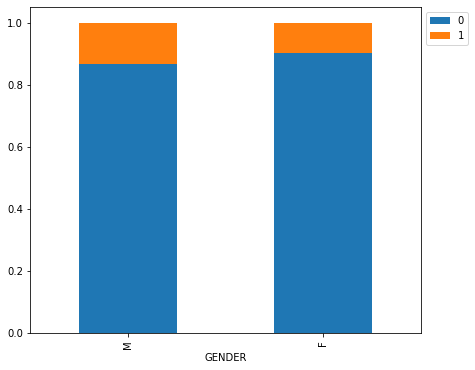

TARGET          0     1    All
OCCUPATION                    
All         17339  2470  19809
SELF-EMP     2825   720   3545
PROF         4700   627   5327
SAL          5196   581   5777
SENP         4618   542   5160
------------------------------------------------------------------------------------------------------------------------


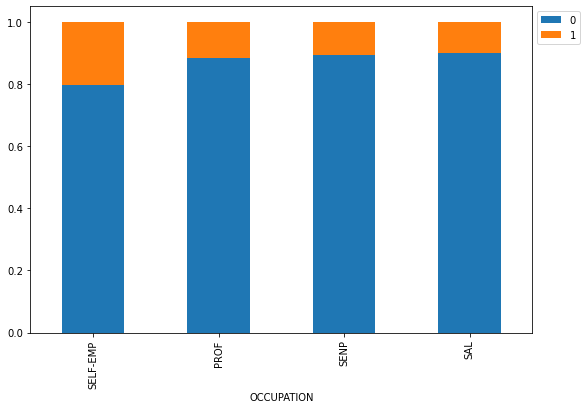

TARGET        0     1    All
ACC_TYPE                    
All       17339  2470  19809
SA        13965  1794  15759
CA         3374   676   4050
------------------------------------------------------------------------------------------------------------------------


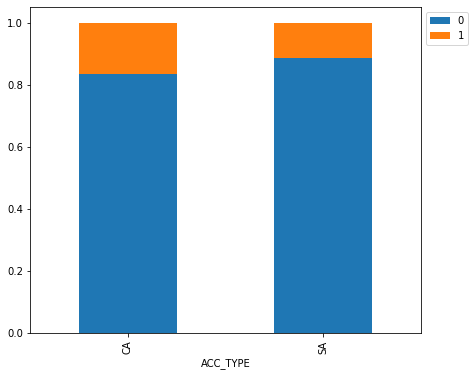

<IPython.core.display.Javascript object>

In [931]:
cols_barplot = ['GENDER', 'OCCUPATION', 'ACC_TYPE']
for col in cols_barplot:
    stacked_barplot(df, col, "TARGET")


In [932]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

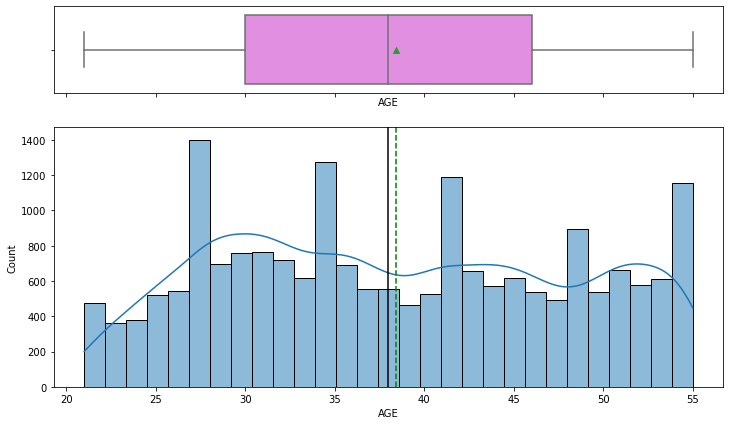

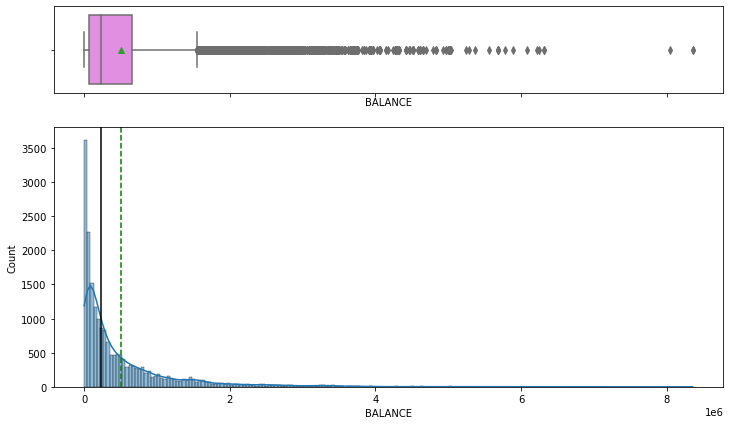

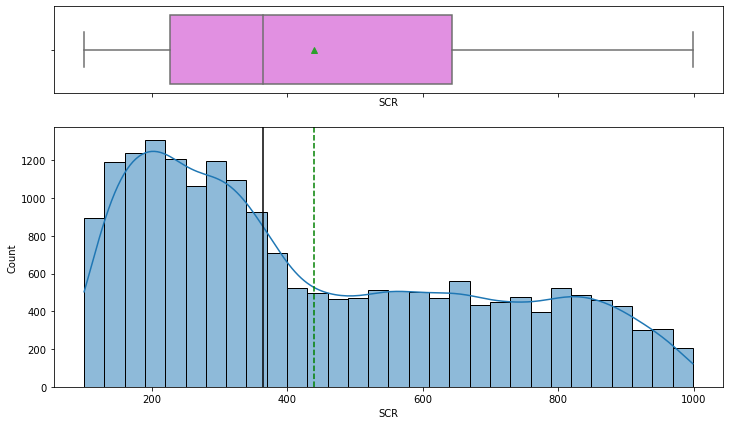

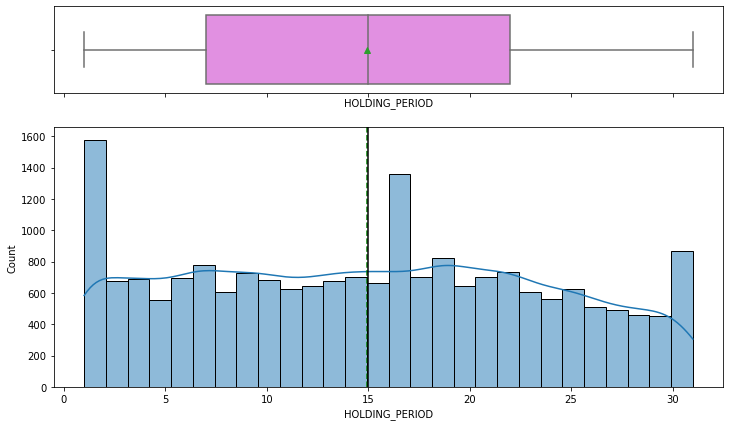

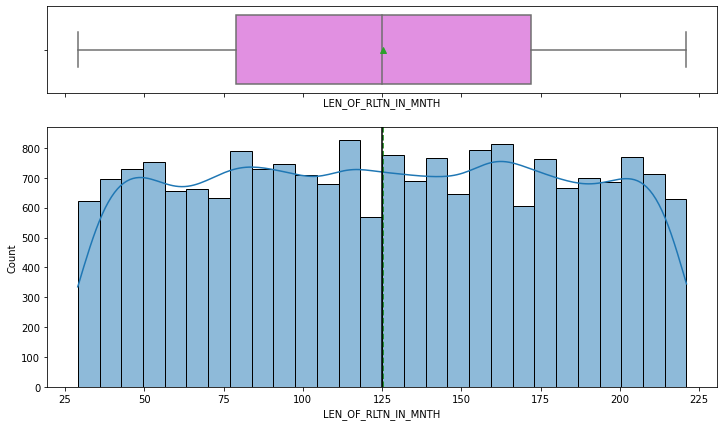

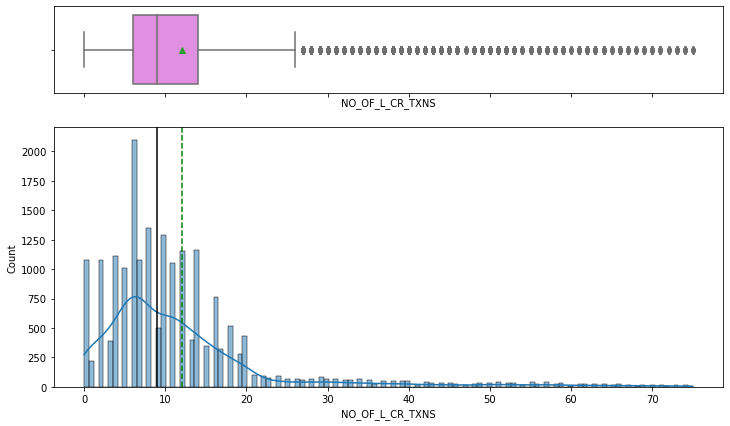

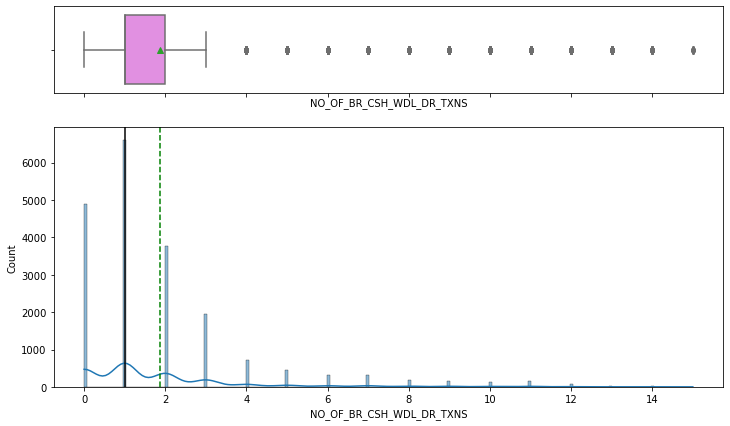

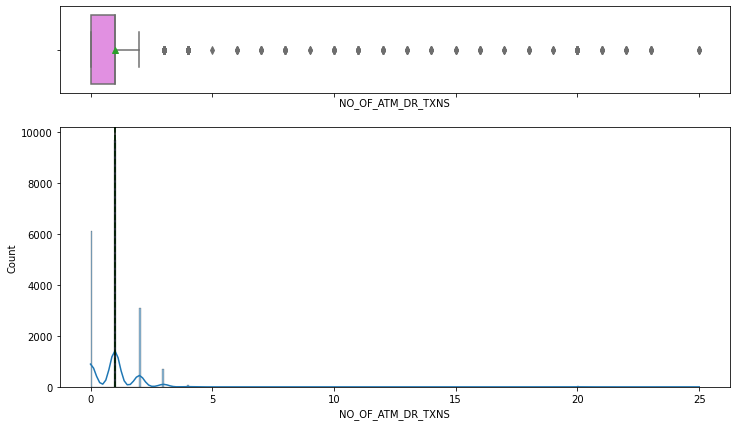

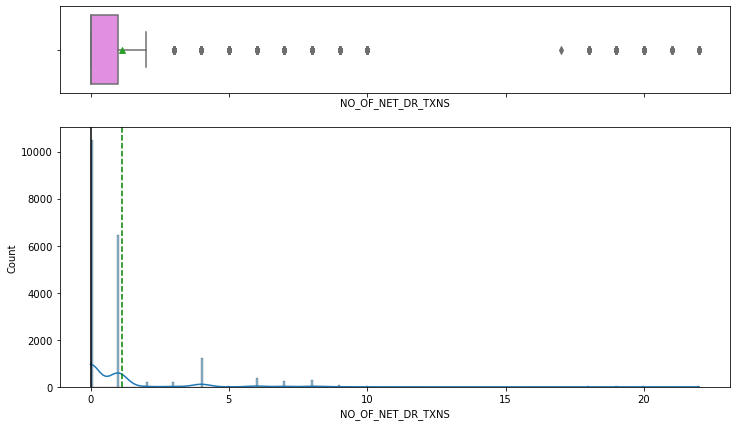

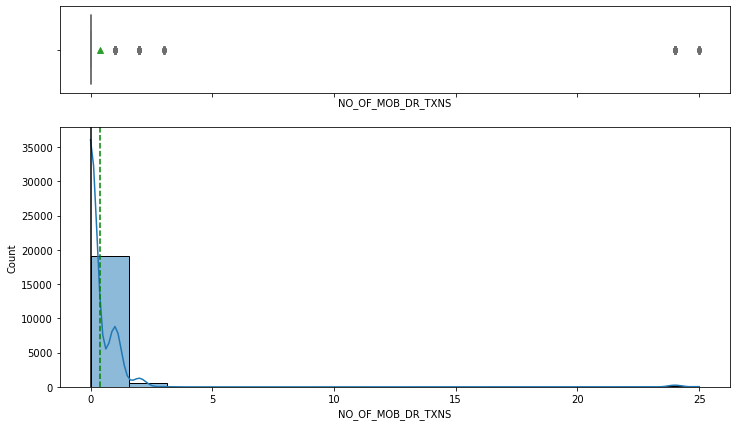

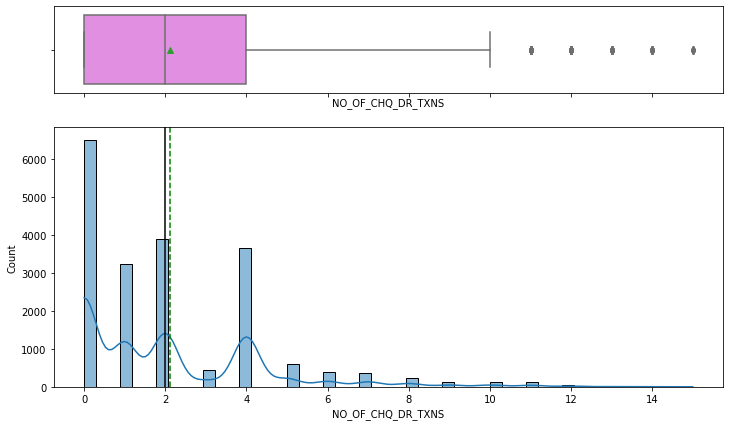

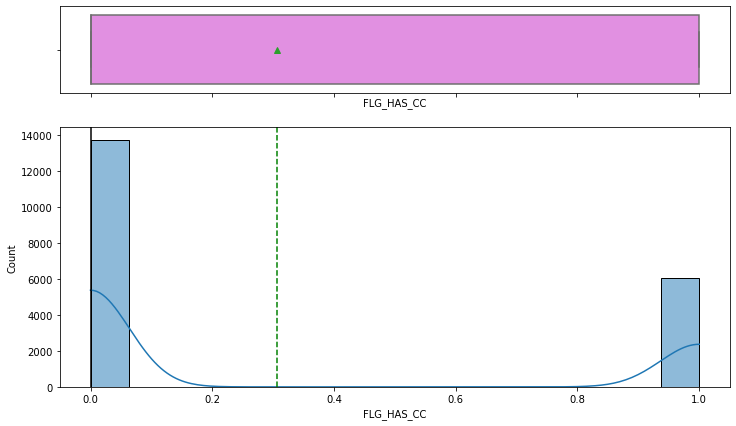

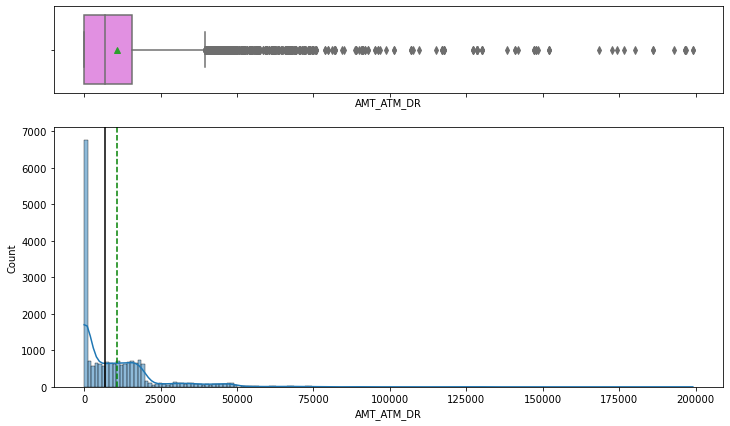

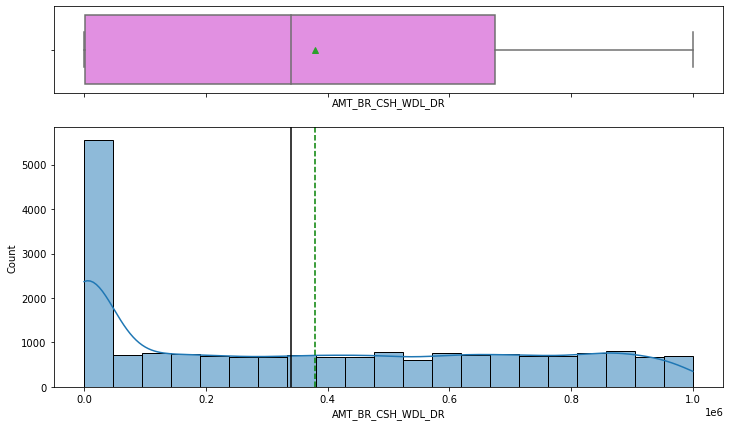

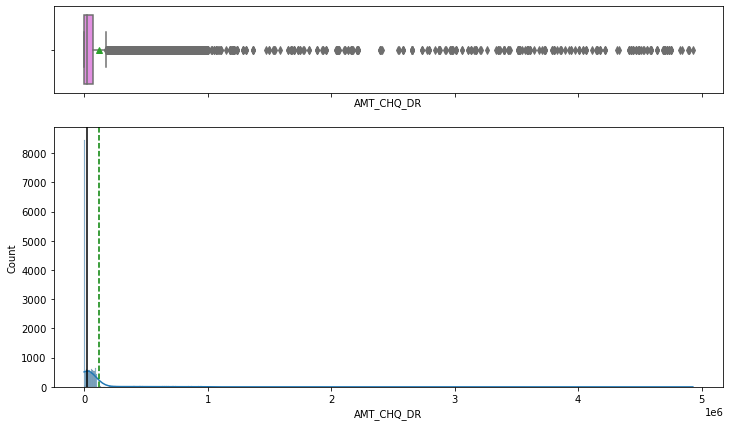

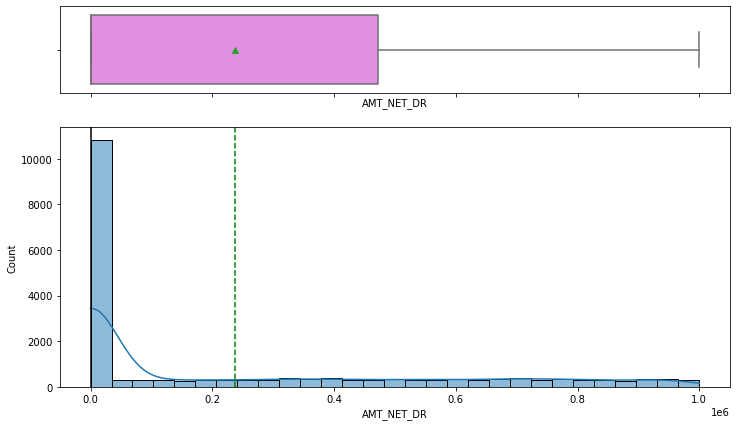

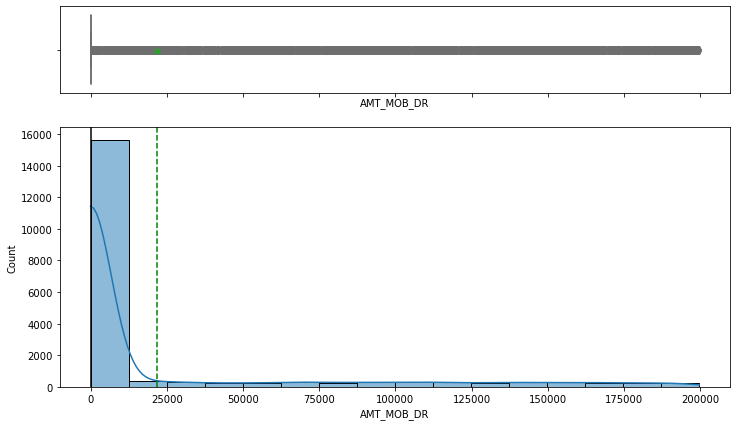

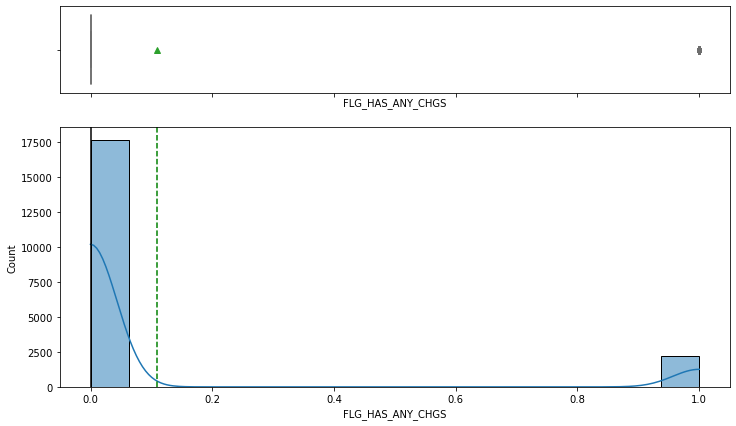

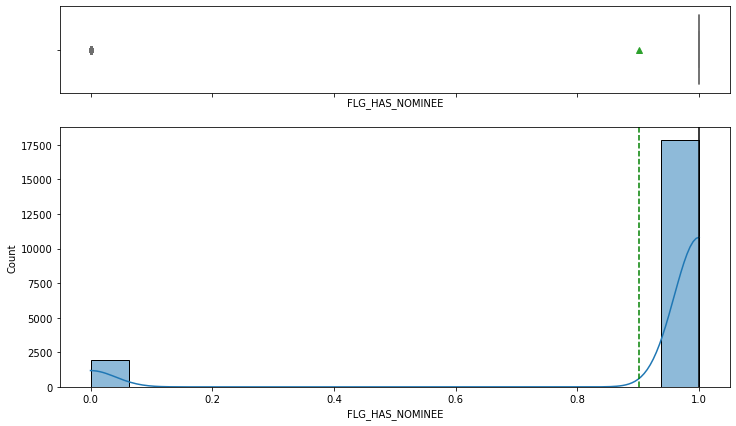

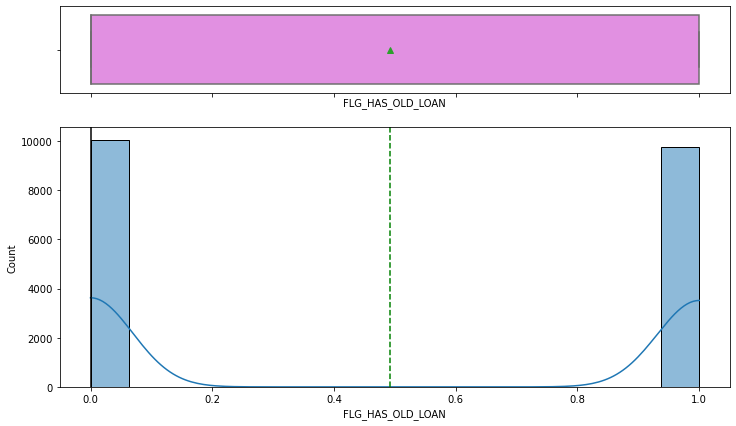

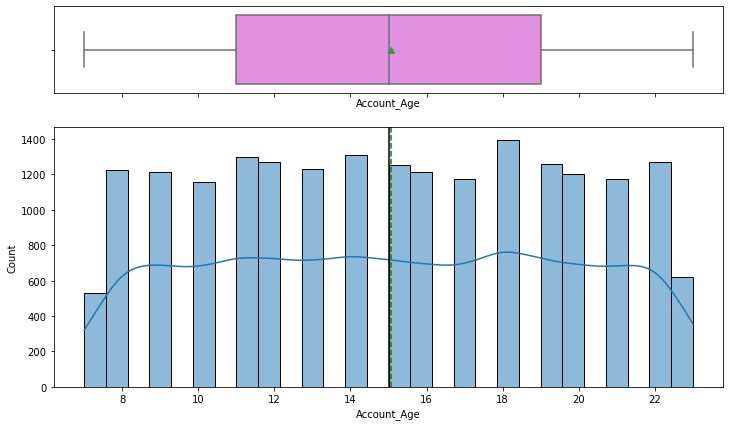

<IPython.core.display.Javascript object>

In [933]:
cols = list(df.columns)
cols.remove('CUST_ID')
cols.remove('TARGET')
cols.remove('GENDER')
cols.remove('OCCUPATION')
cols.remove('ACC_TYPE')


for col in cols:
    histogram_boxplot(df, col, kde=True)


Many data columns are highly skewed and will need to be z transformed. Outliers will need to be examined and treated as well.

In [934]:

df_new = df.copy()

cols_log = ['BALANCE', 'NO_OF_L_CR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR']


def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

cols_zformed = []


for col in cols_log:
    df_new[f'{col}_z'] = z_transform(df[col])
    cols_zformed.append(f'{col}_z')


df_new.drop(cols_log, axis=1, inplace=True)
df_new.head()

    

,CUST_ID,TARGET,AGE,GENDER,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,Account_Age,BALANCE_z,NO_OF_L_CR_TXNS_z,NO_OF_BR_CSH_WDL_DR_TXNS_z,NO_OF_ATM_DR_TXNS_z,NO_OF_NET_DR_TXNS_z,NO_OF_MOB_DR_TXNS_z,NO_OF_CHQ_DR_TXNS_z,AMT_ATM_DR_z,AMT_BR_CSH_WDL_DR_z,AMT_CHQ_DR_z,AMT_NET_DR_z,AMT_MOB_DR_z
0,C7927,0,27,M,SELF-EMP,776,30,SA,146,0,0,1,1,17,-0.707298,-0.432397,-0.834371,-0.011695,0.366414,-0.204289,-0.897972,0.149690,-1.141454,-0.281798,2.308556,-0.447864
1,C6877,0,47,M,SAL,324,28,SA,104,0,1,1,0,13,-0.311569,-0.347853,-0.834371,-0.011695,-0.061199,-0.204289,-0.897972,-0.284597,-1.141454,-0.281798,1.764003,-0.447864
2,C19922,0,40,M,SELF-EMP,603,2,SA,61,0,1,1,1,10,-0.686637,-0.178766,-0.387304,-0.011695,-0.061199,-0.204289,-0.051311,0.022745,0.549921,-0.167573,2.383819,-0.447864
3,C8183,0,53,M,SAL,196,13,CA,107,0,0,1,0,14,-0.612113,2.019361,0.953896,0.673696,0.794026,0.315192,0.795350,1.018264,0.888937,-0.141031,1.581255,1.007539
4,C12123,0,36,M,PROF,167,24,SA,185,0,0,1,0,20,1.616388,0.666667,-0.387304,-0.697086,-0.488811,-0.204289,-0.897972,-0.725565,1.295534,-0.281798,-0.742794,-0.447864


<IPython.core.display.Javascript object>

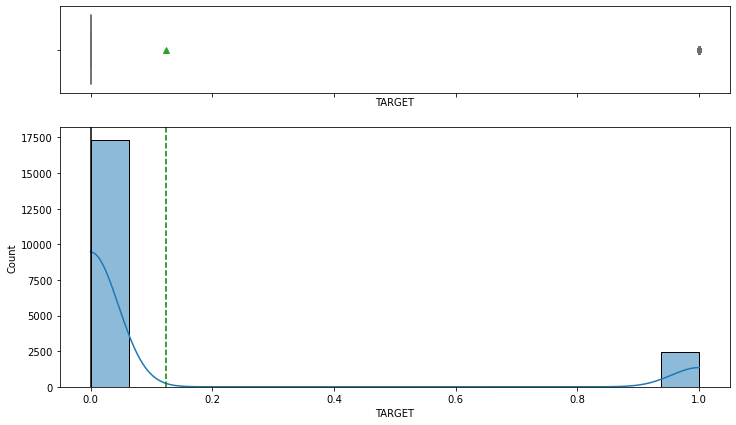

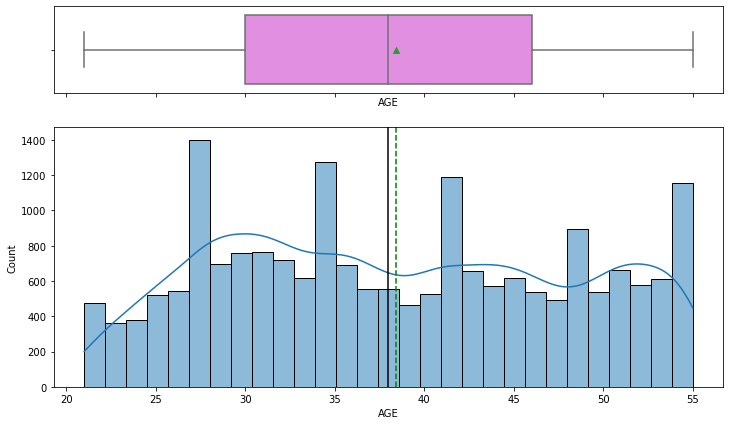

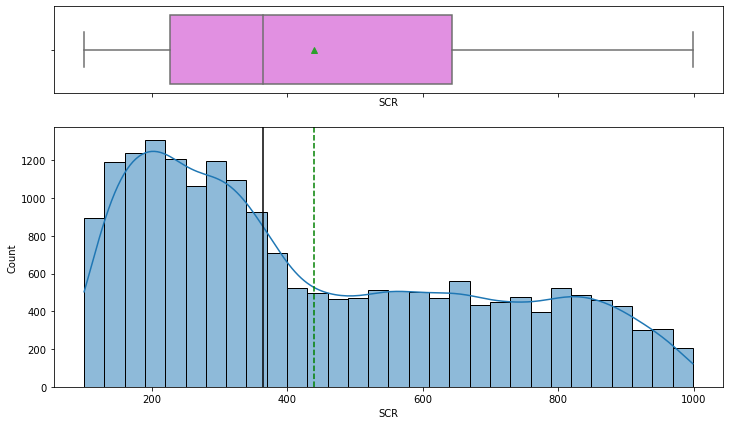

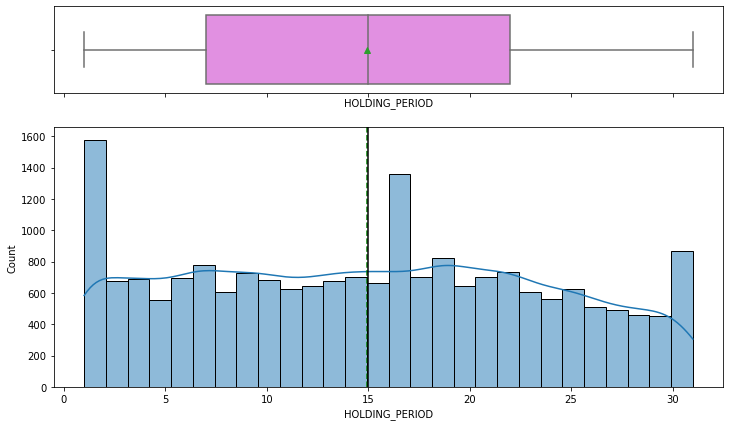

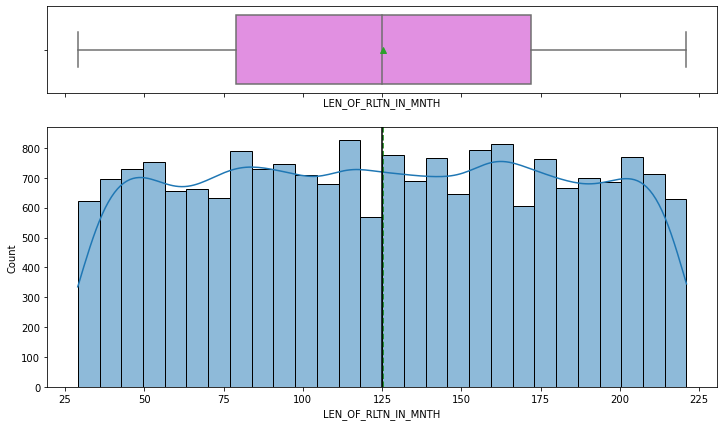

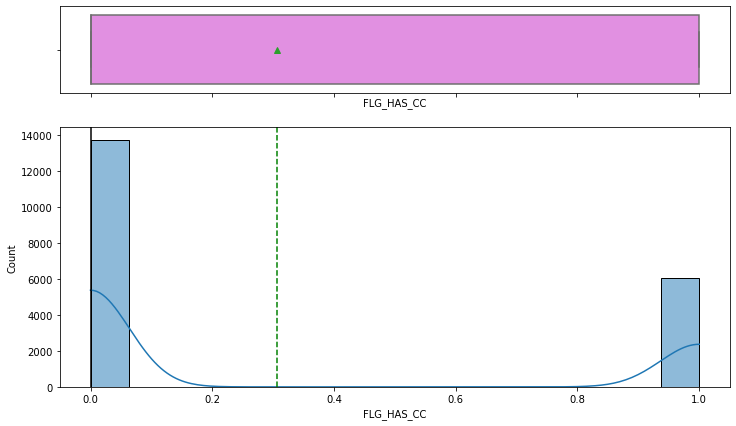

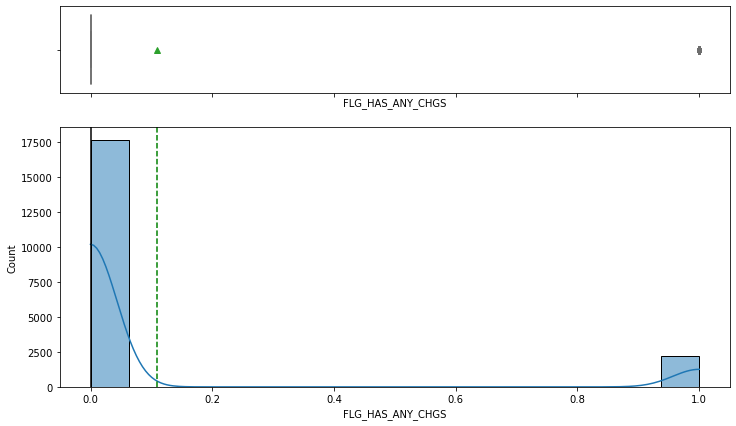

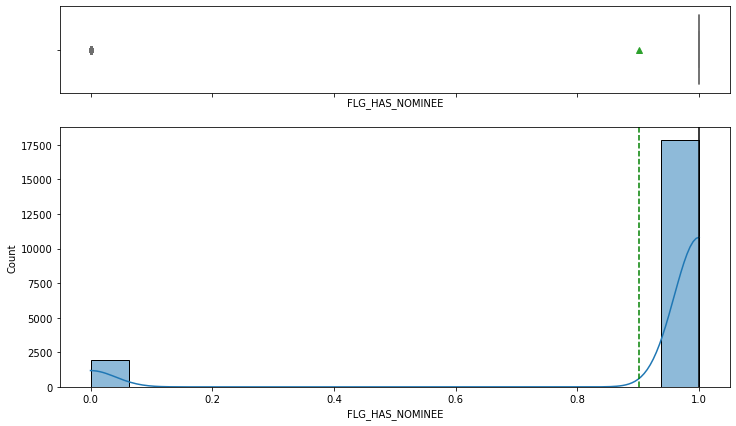

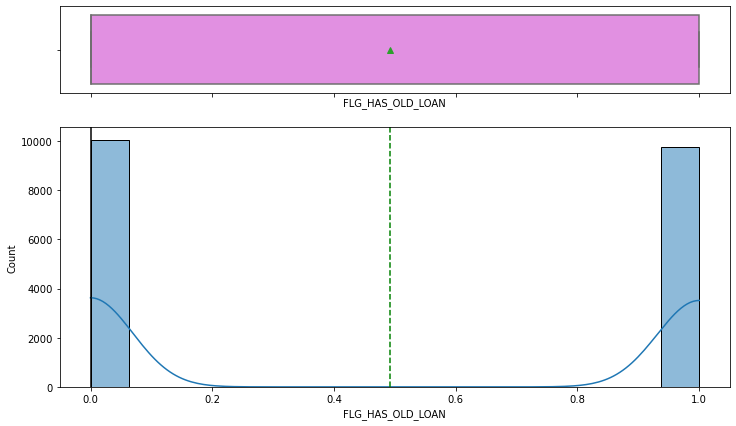

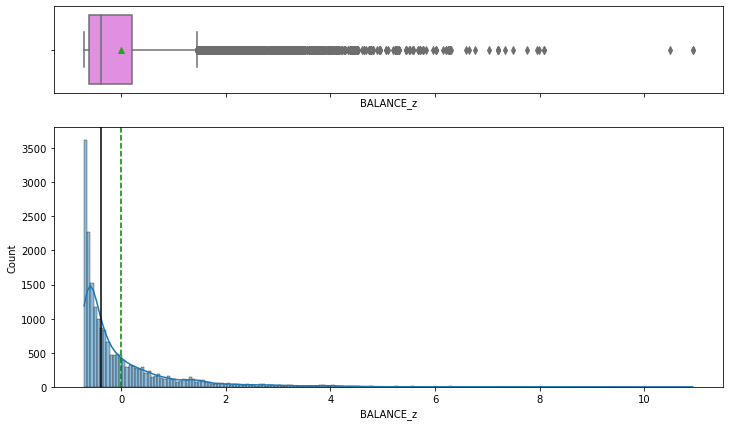

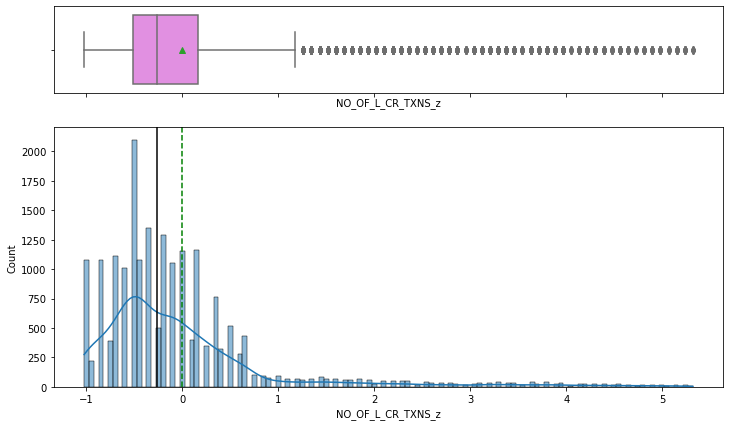

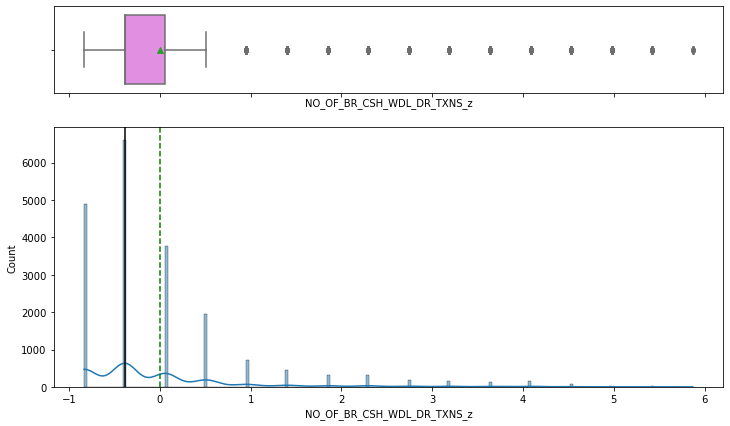

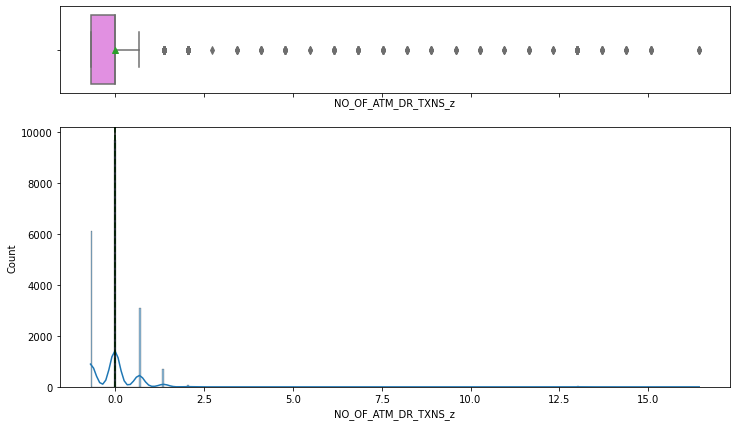

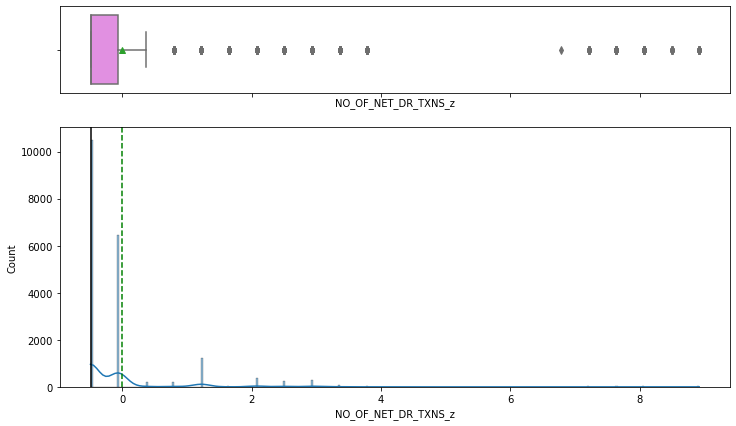

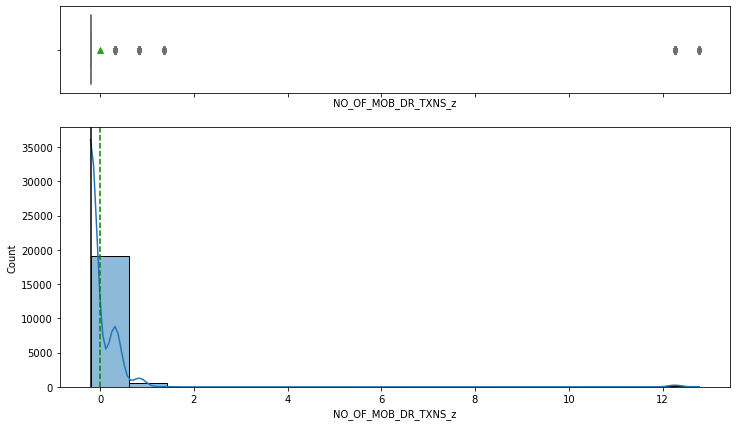

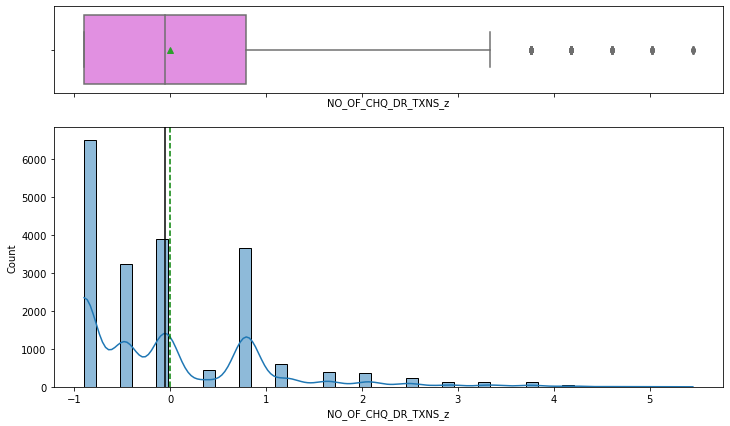

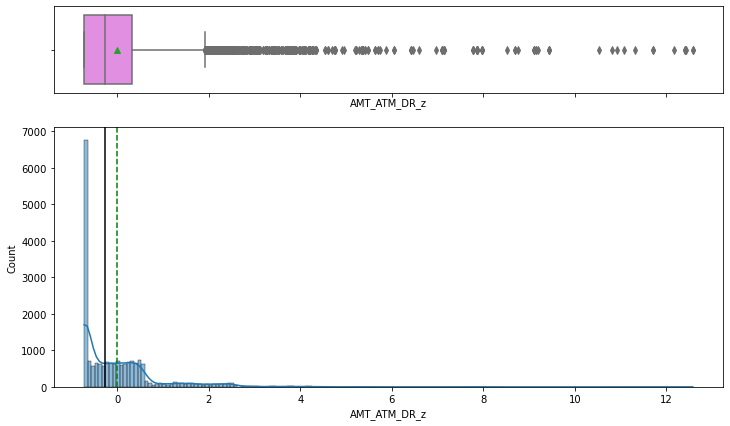

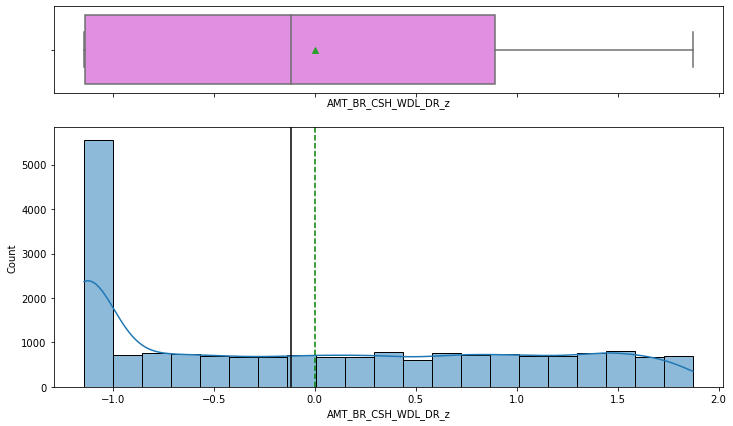

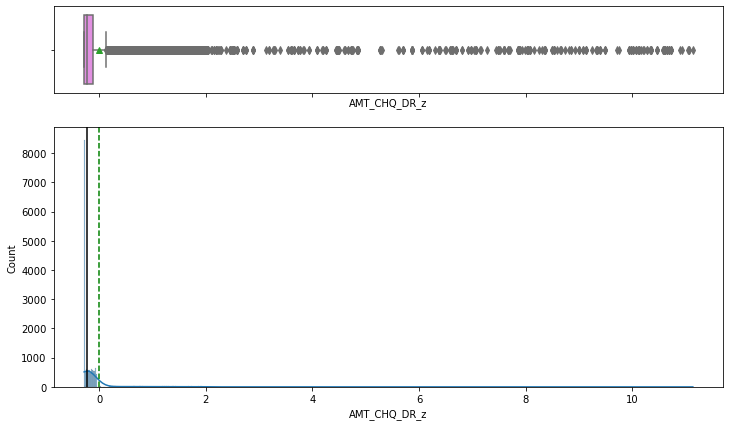

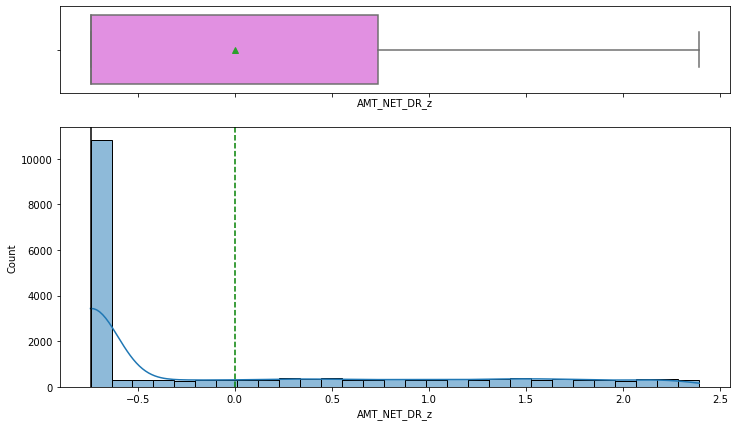

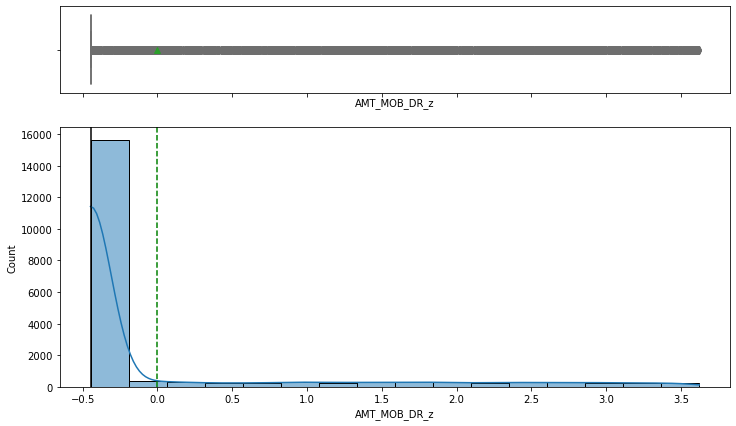

<IPython.core.display.Javascript object>

In [935]:
for col in df_new.select_dtypes(include=["float64", "int64"]):
    histogram_boxplot(df_new, col, kde=True)

Z transformation helped these columns look more normalized but several are still very skewed and there are many outliers still present. 

In [936]:
Q1 = df_new.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = df_new.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (df_new.select_dtypes(include=["float64", "int64"]) < lower)
    | (df_new.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df_new) * 100

AGE                            0.000000
AMT_ATM_DR_z                   5.401585
AMT_BR_CSH_WDL_DR_z            0.000000
AMT_CHQ_DR_z                   9.520925
AMT_MOB_DR_z                  22.333283
AMT_NET_DR_z                   0.000000
Account_Age                    0.000000
BALANCE_z                      8.107426
FLG_HAS_ANY_CHGS              10.974809
FLG_HAS_CC                     0.000000
FLG_HAS_NOMINEE                9.833914
FLG_HAS_OLD_LOAN               0.000000
HOLDING_PERIOD                 0.000000
LEN_OF_RLTN_IN_MNTH            0.000000
NO_OF_ATM_DR_TXNS_z            4.447473
NO_OF_BR_CSH_WDL_DR_TXNS_z    13.019335
NO_OF_CHQ_DR_TXNS_z            1.120703
NO_OF_L_CR_TXNS_z              8.405270
NO_OF_MOB_DR_TXNS_z           22.333283
NO_OF_NET_DR_TXNS_z           13.428240
SCR                            0.000000
TARGET                        12.469080
dtype: float64

<IPython.core.display.Javascript object>

In [937]:
df_new.shape

(19809, 26)

<IPython.core.display.Javascript object>

Dropping ~22% of the data that seems to contain outliers.

In [938]:
num_cols = df_new.select_dtypes(include=["float64", "int64"]).columns.tolist()

<IPython.core.display.Javascript object>

In [939]:
num_cols.remove('TARGET')

<IPython.core.display.Javascript object>

In [940]:
df_new = df_new[~((df_new[num_cols] < lower ) |(df_new[num_cols] > upper)).any(axis=1)]

<IPython.core.display.Javascript object>

In [941]:
df_new.shape

(10489, 26)

<IPython.core.display.Javascript object>

In [942]:
df_new.head()

,CUST_ID,TARGET,AGE,GENDER,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,Account_Age,BALANCE_z,NO_OF_L_CR_TXNS_z,NO_OF_BR_CSH_WDL_DR_TXNS_z,NO_OF_ATM_DR_TXNS_z,NO_OF_NET_DR_TXNS_z,NO_OF_MOB_DR_TXNS_z,NO_OF_CHQ_DR_TXNS_z,AMT_ATM_DR_z,AMT_BR_CSH_WDL_DR_z,AMT_CHQ_DR_z,AMT_NET_DR_z,AMT_MOB_DR_z
0,C7927,0,27,M,SELF-EMP,776,30,SA,146,0,0,1,1,17,-0.707298,-0.432397,-0.834371,-0.011695,0.366414,-0.204289,-0.897972,0.149690,-1.141454,-0.281798,2.308556,-0.447864
5,C257,0,42,F,PROF,493,26,SA,192,1,0,1,1,21,0.014644,-0.601483,-0.387304,-0.011695,-0.488811,-0.204289,-0.897972,0.510482,0.001894,-0.281798,-0.742794,-0.447864
7,C5999,0,53,F,SAL,562,25,CA,99,0,0,1,1,13,-0.630504,0.159407,0.506829,-0.697086,-0.488811,-0.204289,-0.897972,-0.725565,1.707526,-0.281798,-0.742794,-0.447864
10,C18187,0,52,M,SELF-EMP,395,7,SA,160,0,0,1,1,18,-0.692952,-0.432397,-0.387304,-0.011695,-0.061199,-0.204289,-0.051311,0.029426,0.765713,-0.251505,0.453435,-0.447864
12,C3237,0,53,M,SENP,239,20,SA,142,1,0,1,1,16,-0.538594,-0.601483,-0.387304,-0.697086,-0.488811,-0.204289,0.372020,-0.725565,-0.327115,-0.239439,-0.742794,-0.447864


<IPython.core.display.Javascript object>

Outliers have been removed.

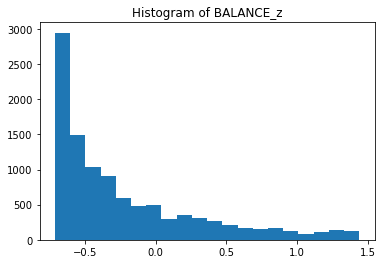

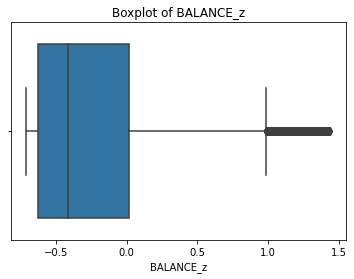

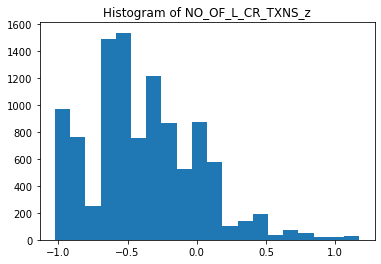

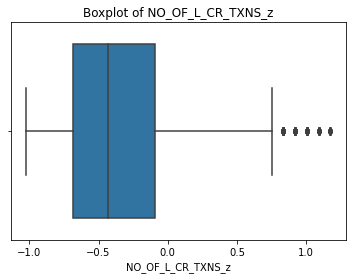

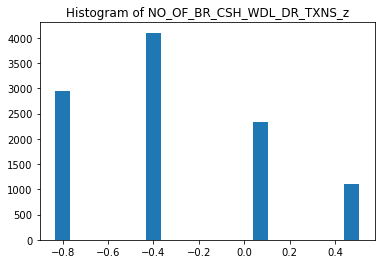

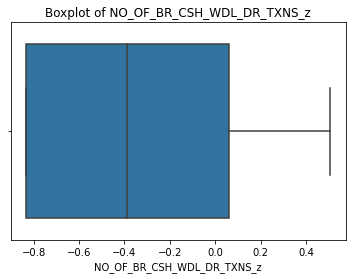

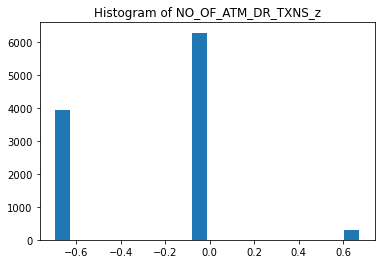

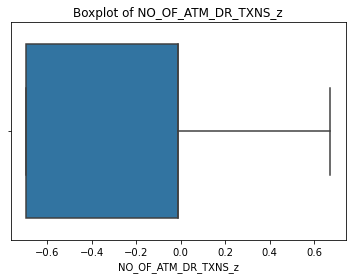

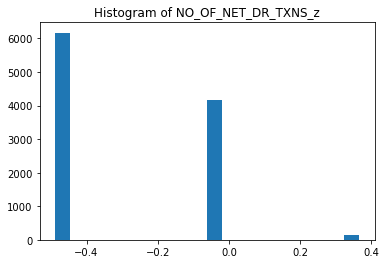

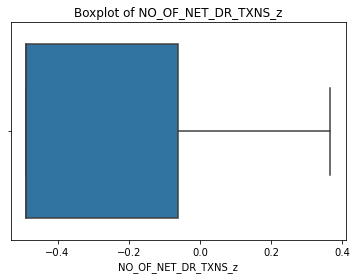

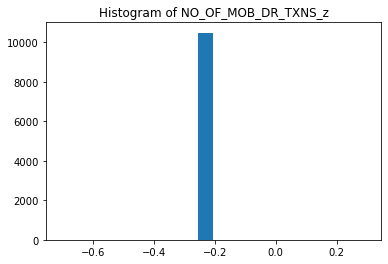

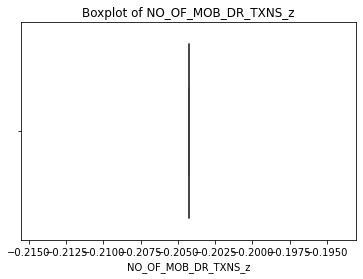

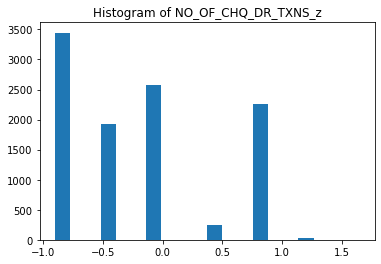

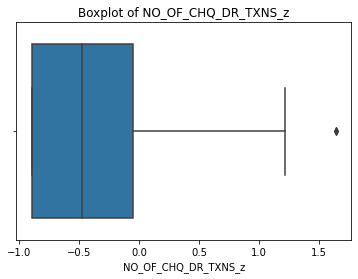

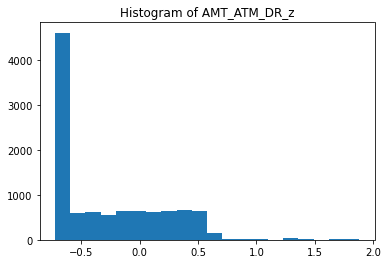

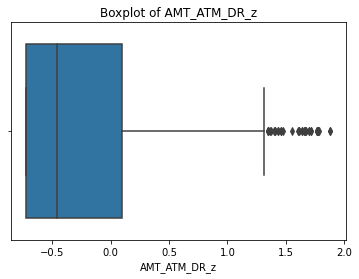

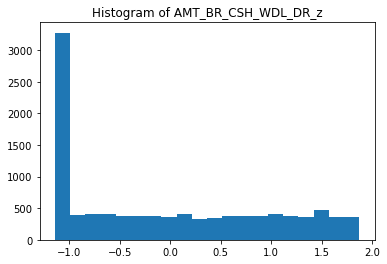

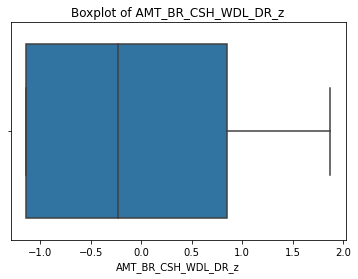

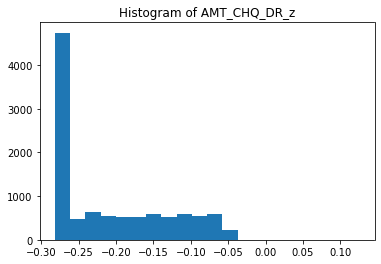

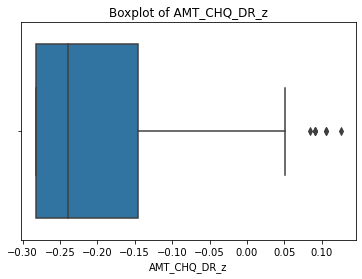

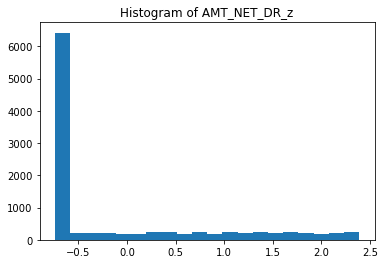

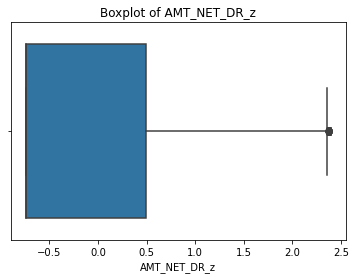

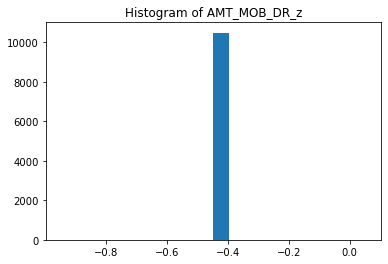

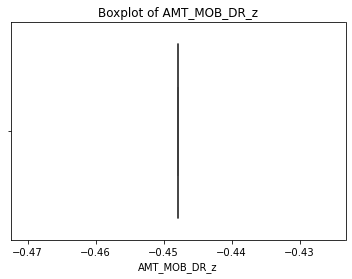

<IPython.core.display.Javascript object>

In [943]:

for col in cols_zformed:
    plt.hist(df_new[col], 20)
    plt.title(f'Histogram of {col}')
    plt.show()

    sns.boxplot(df_new[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Much of the skewed data has now been normalized. There is still some skewness but not as drastic as before.

In [944]:
dum_cols = df_new.select_dtypes(include=["object", "category"]).columns.tolist()
dum_cols.remove('CUST_ID')

<IPython.core.display.Javascript object>

In [945]:
df_new = pd.get_dummies(
    df_new,
    columns=dum_cols,
    drop_first=True,
)

df_new.head()

,CUST_ID,TARGET,AGE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,FLG_HAS_CC,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,Account_Age,BALANCE_z,NO_OF_L_CR_TXNS_z,NO_OF_BR_CSH_WDL_DR_TXNS_z,NO_OF_ATM_DR_TXNS_z,NO_OF_NET_DR_TXNS_z,NO_OF_MOB_DR_TXNS_z,NO_OF_CHQ_DR_TXNS_z,AMT_ATM_DR_z,AMT_BR_CSH_WDL_DR_z,AMT_CHQ_DR_z,AMT_NET_DR_z,AMT_MOB_DR_z,GENDER_M,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA
0,C7927,0,27,776,30,146,0,0,1,1,17,-0.707298,-0.432397,-0.834371,-0.011695,0.366414,-0.204289,-0.897972,0.149690,-1.141454,-0.281798,2.308556,-0.447864,1,0,1,0,1
5,C257,0,42,493,26,192,1,0,1,1,21,0.014644,-0.601483,-0.387304,-0.011695,-0.488811,-0.204289,-0.897972,0.510482,0.001894,-0.281798,-0.742794,-0.447864,0,0,0,0,1
7,C5999,0,53,562,25,99,0,0,1,1,13,-0.630504,0.159407,0.506829,-0.697086,-0.488811,-0.204289,-0.897972,-0.725565,1.707526,-0.281798,-0.742794,-0.447864,0,1,0,0,0
10,C18187,0,52,395,7,160,0,0,1,1,18,-0.692952,-0.432397,-0.387304,-0.011695,-0.061199,-0.204289,-0.051311,0.029426,0.765713,-0.251505,0.453435,-0.447864,1,0,1,0,1
12,C3237,0,53,239,20,142,1,0,1,1,16,-0.538594,-0.601483,-0.387304,-0.697086,-0.488811,-0.204289,0.372020,-0.725565,-0.327115,-0.239439,-0.742794,-0.447864,1,0,0,1,1


<IPython.core.display.Javascript object>

In [946]:
df_new.shape

(10489, 28)

<IPython.core.display.Javascript object>

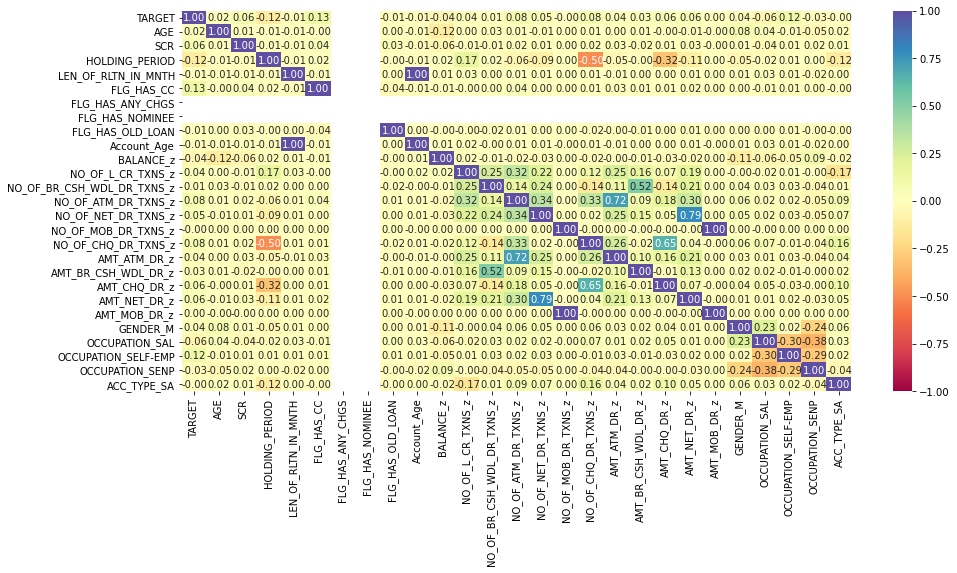

<IPython.core.display.Javascript object>

In [947]:
cols_list = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_new[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The column LEN_OF_RLTN_IN_MTN tells us the same thing as the column we created Account Age, so we should drop one of those columns. 
Also, the column No_OF_MOB_DR_TXNS_log has a high correlation with many variables, so we should drop that as well. We will also drop CUST_ID at this point since it isn't providing value.

In [948]:
df_new.drop(['LEN_OF_RLTN_IN_MNTH','NO_OF_MOB_DR_TXNS_z', 'CUST_ID'], axis=1, inplace=True) 

<IPython.core.display.Javascript object>

In [949]:
print(f'After preparing our data for modeling, it has {df_new.shape[0]:,.0f} rows and {df_new.shape[1]} columns.')

After preparing our data for modeling, it has 10,489 rows and 25 columns.


<IPython.core.display.Javascript object>

In [950]:
X = df_new.drop(["TARGET"], axis=1)
y = df_new["TARGET"]

<IPython.core.display.Javascript object>

Logistic Regression Model

In [951]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)


<IPython.core.display.Javascript object>

In [952]:
print('The number of rows in the train data is', x_train.shape[0])
print('The number of rows in the test data is', x_test.shape[0])

The number of rows in the train data is 7342
The number of rows in the test data is 3147


<IPython.core.display.Javascript object>

In [953]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.89349
1    0.10651
Name: TARGET, dtype: float64
Percentage of classes in test set:
0    0.890372
1    0.109628
Name: TARGET, dtype: float64


<IPython.core.display.Javascript object>

In [954]:
x_test.head(10)

,AGE,SCR,HOLDING_PERIOD,FLG_HAS_CC,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,Account_Age,BALANCE_z,NO_OF_L_CR_TXNS_z,NO_OF_BR_CSH_WDL_DR_TXNS_z,NO_OF_ATM_DR_TXNS_z,NO_OF_NET_DR_TXNS_z,NO_OF_CHQ_DR_TXNS_z,AMT_ATM_DR_z,AMT_BR_CSH_WDL_DR_z,AMT_CHQ_DR_z,AMT_NET_DR_z,AMT_MOB_DR_z,GENDER_M,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA
18878,41,910,27,0,0,1,0,18,-0.597769,-0.516940,-0.834371,-0.011695,-0.488811,-0.897972,-0.391498,-1.141454,-0.281798,-0.742794,-0.447864,1,0,0,1,1
15847,24,614,30,0,0,1,0,13,0.640017,-0.347853,0.059762,-0.011695,-0.488811,-0.897972,-0.685477,0.547780,-0.281798,-0.742794,-0.447864,1,0,0,0,1
1896,43,158,30,0,0,1,0,16,-0.678207,-0.516940,-0.387304,-0.697086,-0.488811,-0.897972,-0.725565,1.378879,-0.281798,-0.742794,-0.447864,1,1,0,0,1
6298,50,208,29,1,0,1,1,8,-0.669929,-0.516940,-0.387304,-0.697086,-0.061199,-0.897972,-0.725565,-0.605967,-0.281798,0.788800,-0.447864,1,1,0,0,1
788,52,538,18,1,0,1,1,21,0.479344,-0.516940,0.059762,-0.011695,-0.061199,-0.051311,-0.404861,-0.051911,-0.180241,1.795160,-0.447864,1,0,0,0,1
11526,35,529,29,0,0,1,1,19,-0.056654,0.243950,0.506829,-0.011695,-0.488811,-0.897972,0.143009,0.345914,-0.281798,-0.742794,-0.447864,0,0,1,0,1
706,31,300,5,0,0,1,0,10,-0.009686,-0.263310,-0.834371,-0.011695,-0.488811,0.795350,0.336767,-1.141454,-0.137557,-0.742794,-0.447864,0,0,0,1,1
5292,39,352,3,0,0,1,0,23,-0.656951,-0.432397,-0.387304,-0.011695,-0.488811,0.795350,0.537208,0.608368,-0.143069,-0.742794,-0.447864,1,0,1,0,1
17636,48,234,10,1,0,1,1,21,-0.292618,-0.432397,0.506829,-0.697086,-0.488811,-0.474641,-0.725565,1.440521,-0.281798,-0.742794,-0.447864,1,0,1,0,1
3025,38,523,25,0,0,1,0,9,0.170028,-0.686027,-0.834371,-0.011695,-0.488811,-0.897972,-0.351410,-1.141454,-0.281798,-0.742794,-0.447864,1,0,0,1,1


<IPython.core.display.Javascript object>

In [955]:

x_train = x_train.reset_index(drop=True)
#y_train = y_train.reset_index()

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


<IPython.core.display.Javascript object>

In [956]:
coef_df = pd.DataFrame(
    np.append(model.coef_, model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.sort_values("Coefficients", ascending=False)

,Coefficients
OCCUPATION_SELF-EMP,0.838252
FLG_HAS_CC,0.727631
NO_OF_ATM_DR_TXNS_z,0.552116
NO_OF_L_CR_TXNS_z,0.464176
AMT_MOB_DR_z,0.395054
AMT_CHQ_DR_z,0.370878
GENDER_M,0.235065
AMT_BR_CSH_WDL_DR_z,0.118892
AMT_NET_DR_z,0.098369
AGE,0.004374


<IPython.core.display.Javascript object>

## Coefficient interpretations Plainly Summarized
### Customers likely to purchase a loan
* Customers with a gender type of "Other" are **much more** likely to purchase a personal loan than other customers.
* Customers with a credit card, have a high number of ATM transactions and who are self-employee are also much more likely to purchase a personal loan than those who are not.
* Customers with a higher number of credit transactions, and customers that transact in large debit amounts both in mobile banking and checks are more likely to purchase a personal loan than other customers.
<br>
<br>
### Customers not likely to purchase a loan
* Customers with a nominee type of "Other" are **much less** likely to purchase a personal loan than other customers.
* Customers with a high salary, who transact in a large number of branch cash withdrawls, have a savings account, withdrawl large amounts from the ATM and a have large balance are also less likely to purchase a personal loan than other customers.


In [957]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [958]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Performance on Training Set


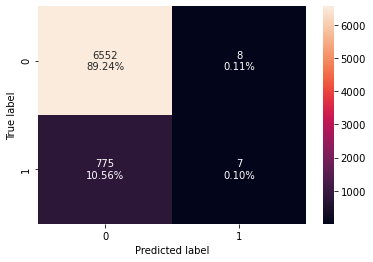

<IPython.core.display.Javascript object>

In [959]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(model, x_train, y_train)

In [960]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.893353,0.008951,0.466667,0.017566


<IPython.core.display.Javascript object>

### Model Performance on Test Set


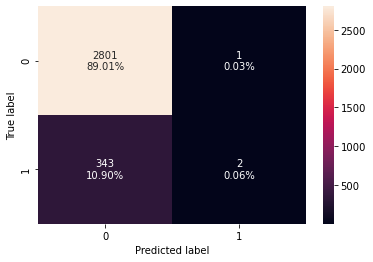

<IPython.core.display.Javascript object>

In [961]:

confusion_matrix_sklearn_with_threshold(model, x_test, y_test)

In [962]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.89069,0.005797,0.666667,0.011494


<IPython.core.display.Javascript object>

The F1 Score is very poor. This is not a good model at all.

The model does a relatively good job of predicting those customers who aren't likely to purchase a loan but doesn't do a good job of predicting customers that will purchase the loan. This isn't good because we want the model to do a good job of predicting customers that *are likely* to purchase a loan.
<br>
<br>
The good news is the model performs similarly on the training and test sets so the model doesn't seem to be overfit.

#### ROC-AUC

* ROC-AUC on training set

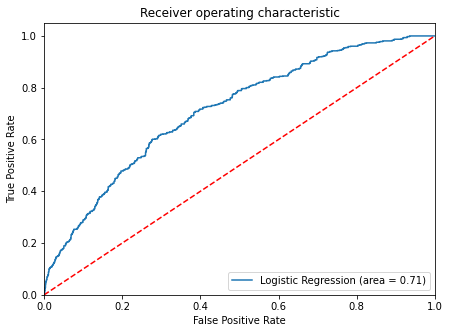

<IPython.core.display.Javascript object>

In [963]:
logit_roc_auc_train = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

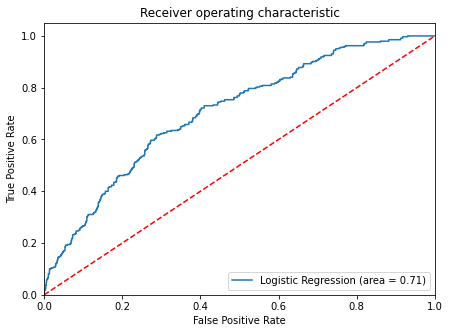

<IPython.core.display.Javascript object>

In [964]:
logit_roc_auc_test = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The Receiver operating characteristic does a decent job of evaluating performance of the model, however the F1 score is the most telling; it will accurately predict who will purchase the loan with 2% accuracy. It shows there's significant room for improvement in the model.

To see if the F1 score and overall performance can be improved, the threshold will be changed using the AUC-ROC curve.

In [965]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1201016474513288


<IPython.core.display.Javascript object>

Enhanced model training set

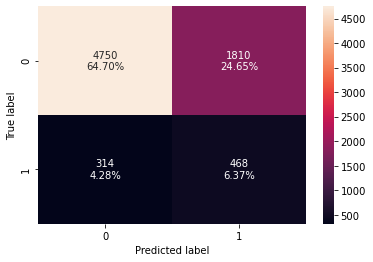

<IPython.core.display.Javascript object>

In [966]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_auc_roc
)

In [967]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.710706,0.598465,0.205443,0.305882


<IPython.core.display.Javascript object>

Enhanced model test set

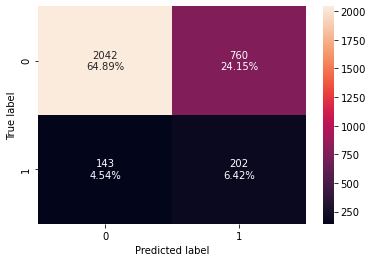

<IPython.core.display.Javascript object>

In [981]:
    # creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_auc_roc
)

In [982]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.71306,0.585507,0.209979,0.309105


<IPython.core.display.Javascript object>

The F1 score has improved drastically, but it still a good enough model to classify customers who are likely to buy a loan. In addition, the F1 score has improved at the cost of the accuracy and precision reduced significantly.

Precision-Recall curve will be used to see if a better threshold can be obtained for our model.

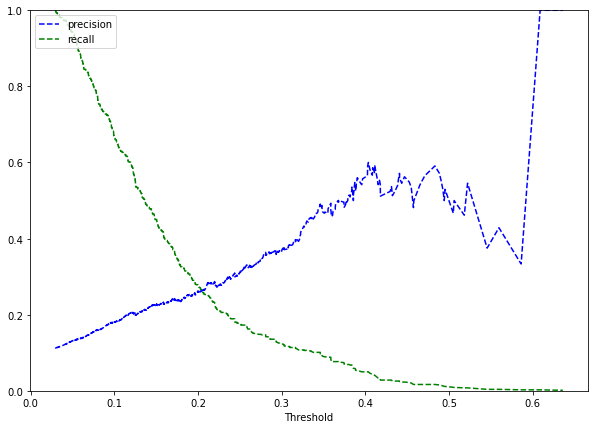

<IPython.core.display.Javascript object>

In [970]:
y_scores = model.predict_proba(x_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.21, we get balanced recall and precision.

In [975]:
# setting the threshold
optimal_threshold_curve = 0.21

<IPython.core.display.Javascript object>

Model training performance

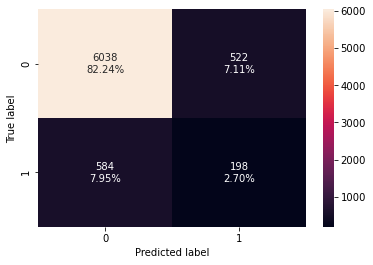

<IPython.core.display.Javascript object>

In [976]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)

In [977]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.84936,0.253197,0.275,0.263648


<IPython.core.display.Javascript object>

Model test performance

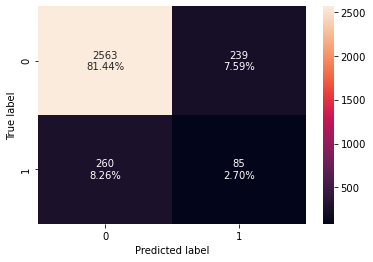

<IPython.core.display.Javascript object>

In [978]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_curve
)

In [979]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    model, x_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.841436,0.246377,0.262346,0.254111


<IPython.core.display.Javascript object>

* Model performance is very similar between on training and test sets.
* While performance is more balanced perhaps than the AUC-ROC threshold built model, it is still a poor model.

In [980]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.21 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold,Logistic Regression-0.21 Threshold
Accuracy,0.893353,0.710706,0.849360
Recall,0.008951,0.598465,0.253197
Precision,0.466667,0.205443,0.275000
F1,0.017566,0.305882,0.263648


<IPython.core.display.Javascript object>

In [983]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.21 Threshold"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold,Logistic Regression-0.21 Threshold
Accuracy,0.890690,0.713060,0.841436
Recall,0.005797,0.585507,0.246377
Precision,0.666667,0.209979,0.262346
F1,0.011494,0.309105,0.254111


<IPython.core.display.Javascript object>

The logistic regression model with a .12 threshold performs the best.
<br>
However, all of the logistic regression models do not do a good job of classifying customers who are likely to purchase a loan.


Decision Tree Model

In [984]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

<IPython.core.display.Javascript object>

In [985]:

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

Training Performance

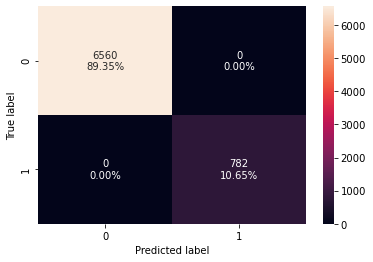

<IPython.core.display.Javascript object>

In [988]:
confusion_matrix_sklearn_with_threshold(dTree, x_train, y_train)

In [995]:
decision_tree_perf_train = model_performance_classification_sklearn_with_threshold(
    dTree, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

Testing Performance

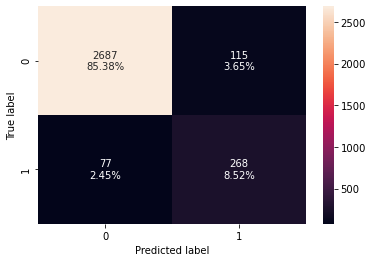

<IPython.core.display.Javascript object>

In [997]:
confusion_matrix_sklearn_with_threshold(dTree, x_test, y_test)

In [998]:
decision_tree_perf_test = model_performance_classification_sklearn_with_threshold(
    dTree, x_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.93899,0.776812,0.699739,0.736264


<IPython.core.display.Javascript object>

In [992]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9389895138226882


<IPython.core.display.Javascript object>

* Model is performing perfectly during training and also quite well on the test set. 

In [993]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['AGE', 'SCR', 'HOLDING_PERIOD', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'Account_Age', 'BALANCE_z', 'NO_OF_L_CR_TXNS_z', 'NO_OF_BR_CSH_WDL_DR_TXNS_z', 'NO_OF_ATM_DR_TXNS_z', 'NO_OF_NET_DR_TXNS_z', 'NO_OF_CHQ_DR_TXNS_z', 'AMT_ATM_DR_z', 'AMT_BR_CSH_WDL_DR_z', 'AMT_CHQ_DR_z', 'AMT_NET_DR_z', 'AMT_MOB_DR_z', 'GENDER_M', 'OCCUPATION_SAL', 'OCCUPATION_SELF-EMP', 'OCCUPATION_SENP', 'ACC_TYPE_SA']


<IPython.core.display.Javascript object>

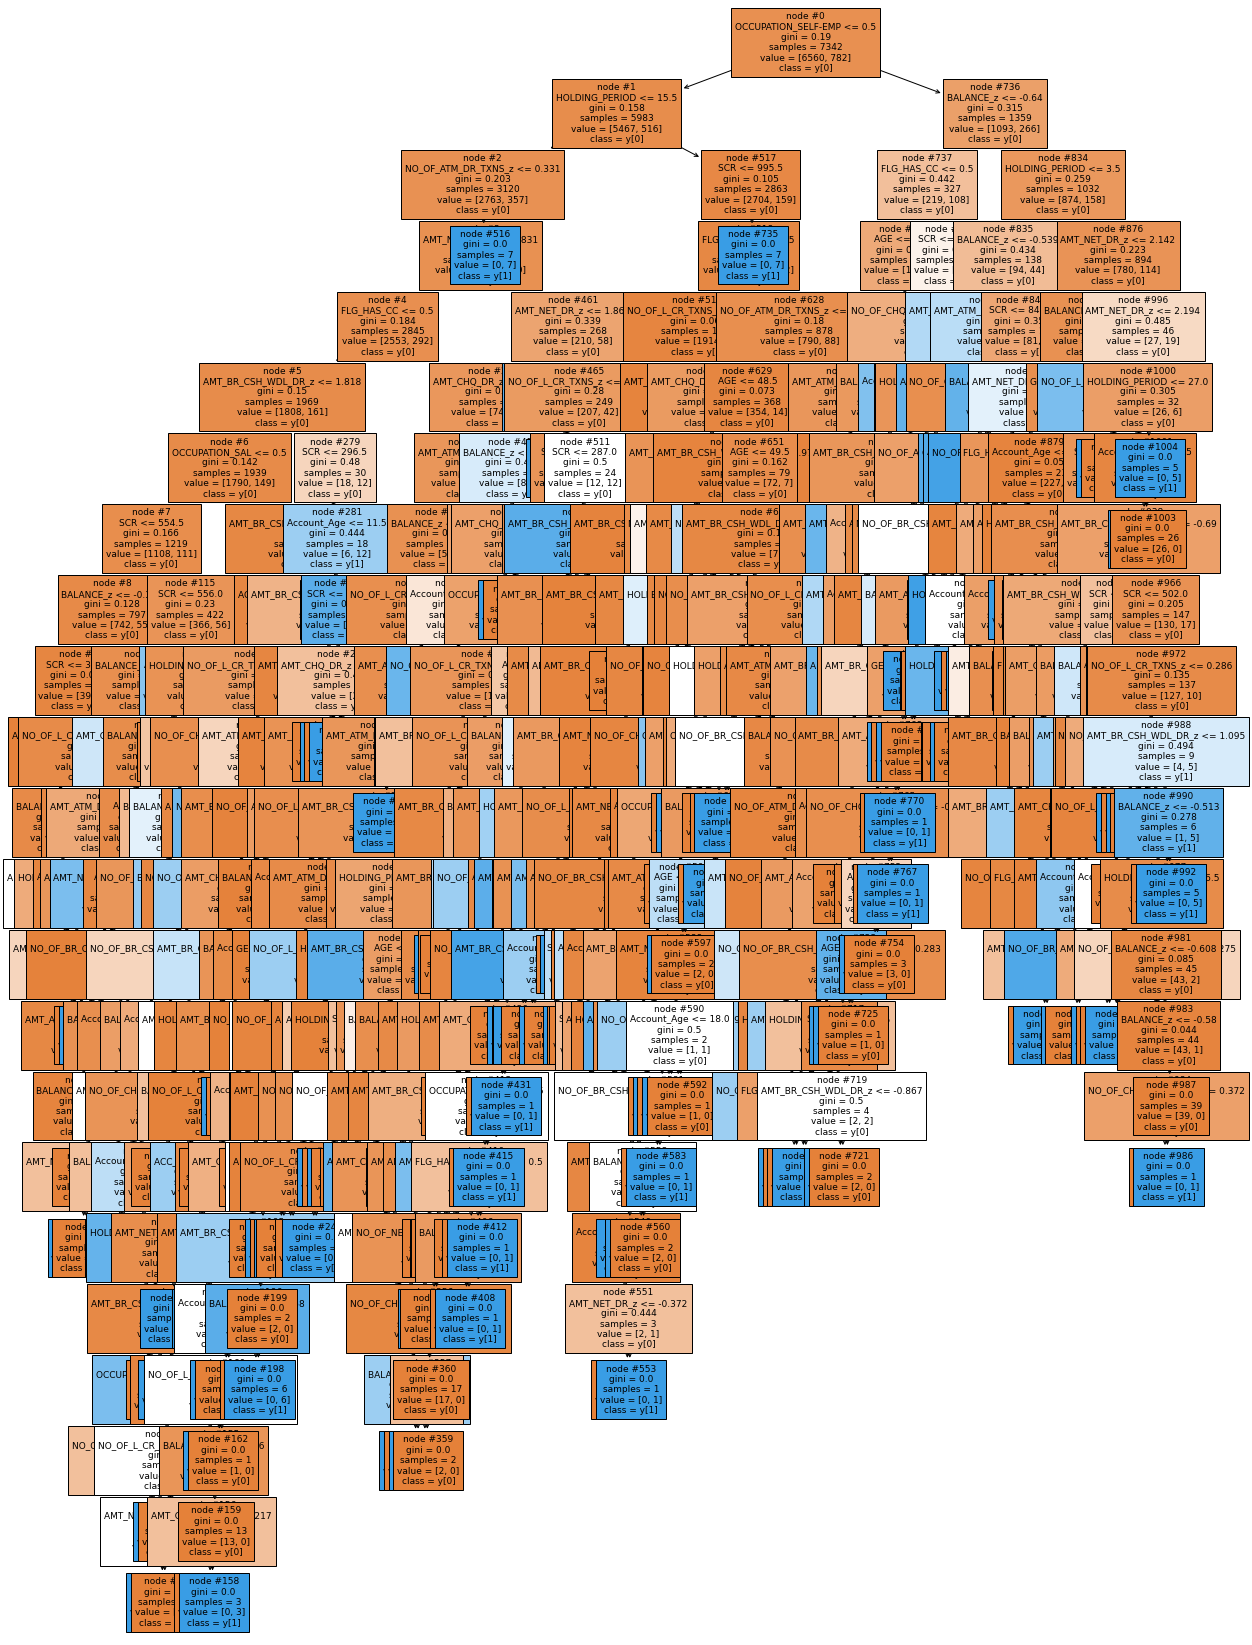

<IPython.core.display.Javascript object>

In [999]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [1000]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- OCCUPATION_SELF-EMP <= 0.50
|   |--- HOLDING_PERIOD <= 15.50
|   |   |--- NO_OF_ATM_DR_TXNS_z <= 0.33
|   |   |   |--- AMT_NET_DR_z <= 1.83
|   |   |   |   |--- FLG_HAS_CC <= 0.50
|   |   |   |   |   |--- AMT_BR_CSH_WDL_DR_z <= 1.82
|   |   |   |   |   |   |--- OCCUPATION_SAL <= 0.50
|   |   |   |   |   |   |   |--- SCR <= 554.50
|   |   |   |   |   |   |   |   |--- BALANCE_z <= -0.32
|   |   |   |   |   |   |   |   |   |--- SCR <= 318.00
|   |   |   |   |   |   |   |   |   |   |--- Account_Age <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [201.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Account_Age >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- SCR >  318.00
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_TXNS_z <= -0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_T

<IPython.core.display.Javascript object>

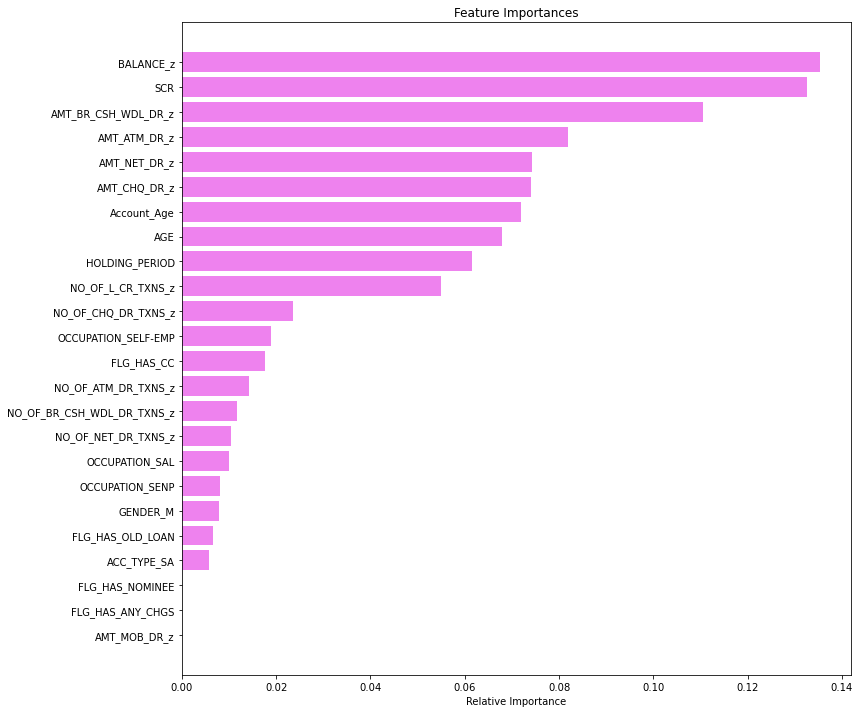

<IPython.core.display.Javascript object>

In [1001]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Balance, marketing score and amount cash withdrawn from Branch are the top 3 important features for this successful model.

### GridSearch for Hyperparameter tuning of our tree model 
* GridSeach will be utilized to see if model performance can be improved even more.

In [1003]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

Training set Performance

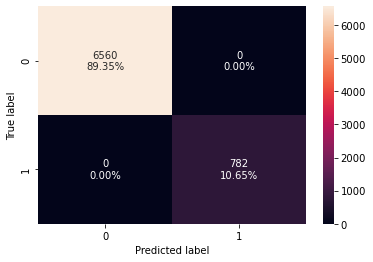

<IPython.core.display.Javascript object>

In [1004]:
confusion_matrix_sklearn_with_threshold(estimator, x_train, y_train)

In [1005]:
decision_tree_tune_perf_train = model_performance_classification_sklearn_with_threshold(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

Test set Performance

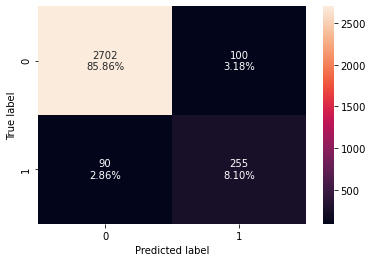

<IPython.core.display.Javascript object>

In [1006]:
confusion_matrix_sklearn_with_threshold(estimator, x_test, y_test)

In [1033]:
decision_tree_tune_perf_test = model_performance_classification_sklearn_with_threshold(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.939625,0.73913,0.71831,0.728571


<IPython.core.display.Javascript object>

* After hyperparameter tuning the model has performance has improved slightly in accuracy and precision, and deteriorated slightly for recall and F!. The model has also become simpler.

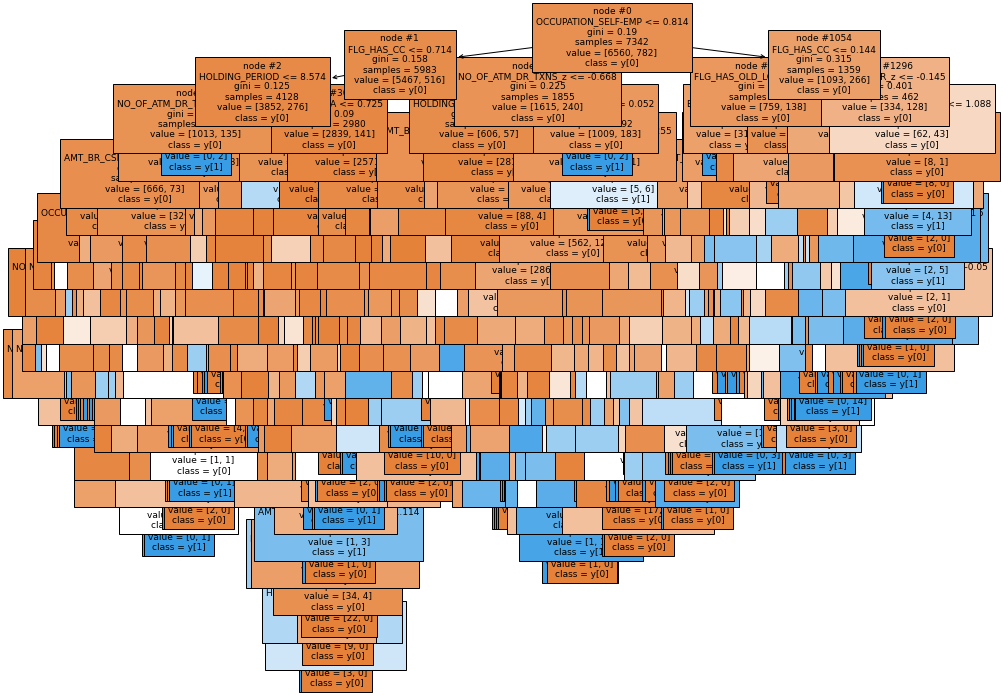

<IPython.core.display.Javascript object>

In [1008]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* Our tree is more simple after pre-pruning.

### Cost Complexity Pruning

In [1009]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [1010]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000090,0.000270
2,0.000090,0.000541
3,0.000108,0.001083
4,0.000121,0.001325
...,...,...
233,0.001313,0.171788
234,0.001514,0.176332
235,0.001652,0.184592
236,0.002123,0.186716


<IPython.core.display.Javascript object>

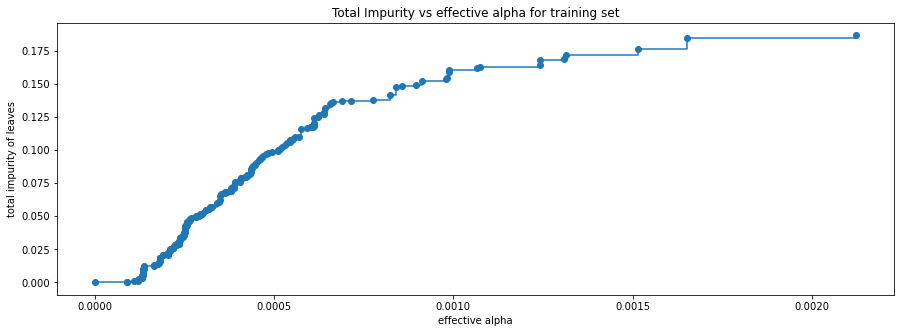

<IPython.core.display.Javascript object>

In [1011]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we will train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is
 the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [1012]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0036163556089770232


<IPython.core.display.Javascript object>

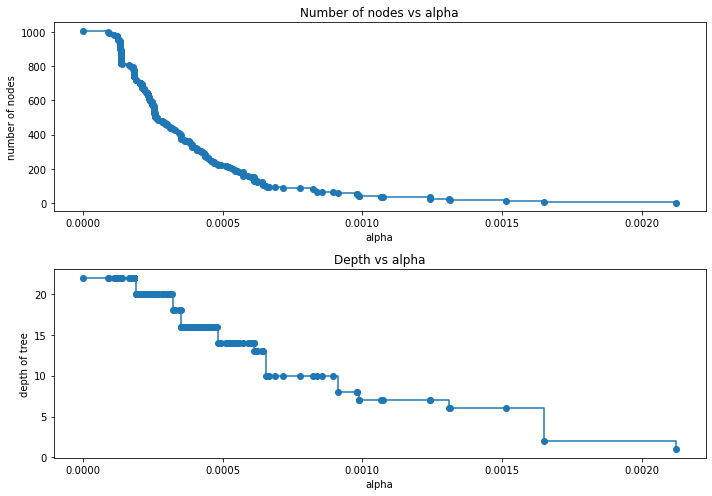

<IPython.core.display.Javascript object>

In [1013]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [1017]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [1018]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

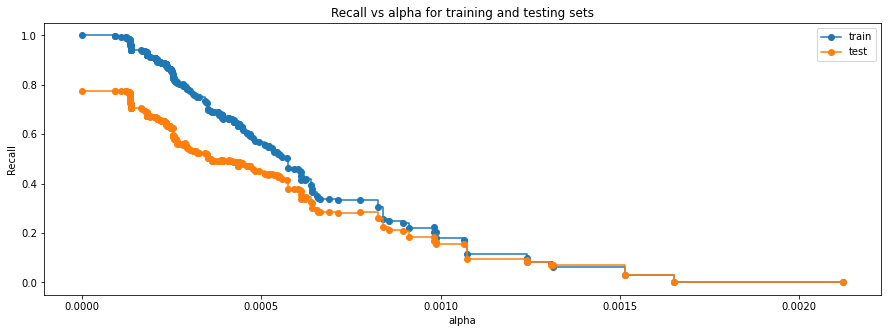

<IPython.core.display.Javascript object>

In [1019]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [1020]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

Training Set Performance

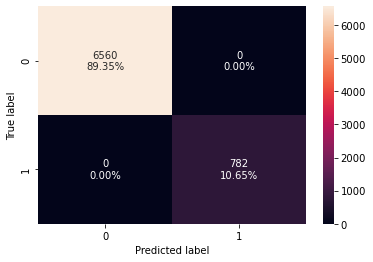

<IPython.core.display.Javascript object>

In [1021]:
confusion_matrix_sklearn_with_threshold(best_model, x_train, y_train)

In [1022]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn_with_threshold(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

Testing Set Performance

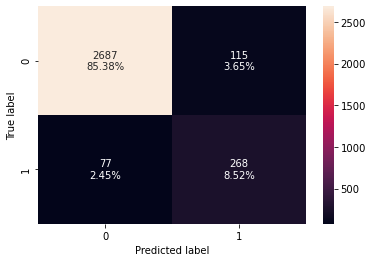

<IPython.core.display.Javascript object>

In [1023]:
confusion_matrix_sklearn_with_threshold(best_model, x_test, y_test)

In [1034]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn_with_threshold(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.93899,0.776812,0.699739,0.736264


<IPython.core.display.Javascript object>

* With post-pruning we are getting identical results to our original decision tree model.

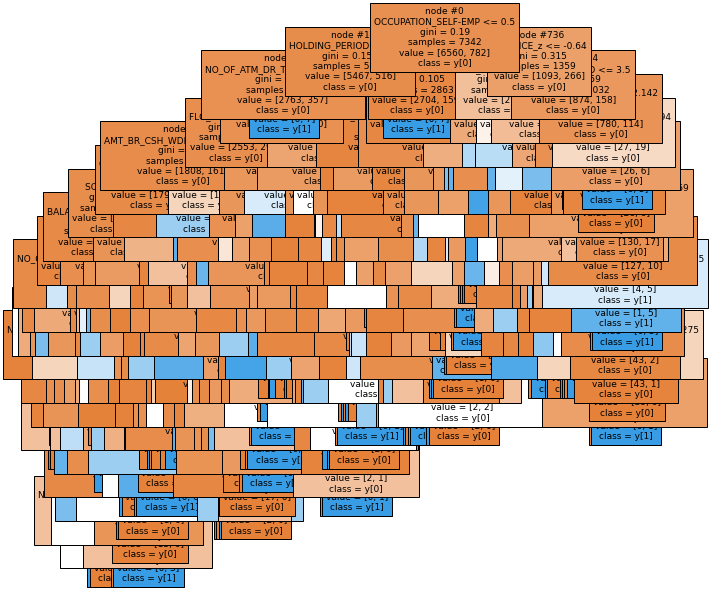

<IPython.core.display.Javascript object>

In [1025]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [1026]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- OCCUPATION_SELF-EMP <= 0.50
|   |--- HOLDING_PERIOD <= 15.50
|   |   |--- NO_OF_ATM_DR_TXNS_z <= 0.33
|   |   |   |--- AMT_NET_DR_z <= 1.83
|   |   |   |   |--- FLG_HAS_CC <= 0.50
|   |   |   |   |   |--- AMT_BR_CSH_WDL_DR_z <= 1.82
|   |   |   |   |   |   |--- OCCUPATION_SAL <= 0.50
|   |   |   |   |   |   |   |--- SCR <= 554.50
|   |   |   |   |   |   |   |   |--- BALANCE_z <= -0.32
|   |   |   |   |   |   |   |   |   |--- SCR <= 318.00
|   |   |   |   |   |   |   |   |   |   |--- Account_Age <= 21.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [201.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Account_Age >  21.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- SCR >  318.00
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_TXNS_z <= -0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- NO_OF_L_CR_T

<IPython.core.display.Javascript object>

In [1028]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
BALANCE_z                   0.135227
SCR                         0.132611
AMT_BR_CSH_WDL_DR_z         0.110579
AMT_ATM_DR_z                0.081926
AMT_NET_DR_z                0.074151
AMT_CHQ_DR_z                0.074071
Account_Age                 0.071852
AGE                         0.067916
HOLDING_PERIOD              0.061464
NO_OF_L_CR_TXNS_z           0.054940
NO_OF_CHQ_DR_TXNS_z         0.023664
OCCUPATION_SELF-EMP         0.019000
FLG_HAS_CC                  0.017660
NO_OF_ATM_DR_TXNS_z         0.014237
NO_OF_BR_CSH_WDL_DR_TXNS_z  0.011631
NO_OF_NET_DR_TXNS_z         0.010515
OCCUPATION_SAL              0.010034
OCCUPATION_SENP             0.008156
GENDER_M                    0.007916
FLG_HAS_OLD_LOAN            0.006702
ACC_TYPE_SA                 0.005746
FLG_HAS_NOMINEE             0.000000
AMT_MOB_DR_z                0.000000
FLG_HAS_ANY_CHGS            0.000000


<IPython.core.display.Javascript object>

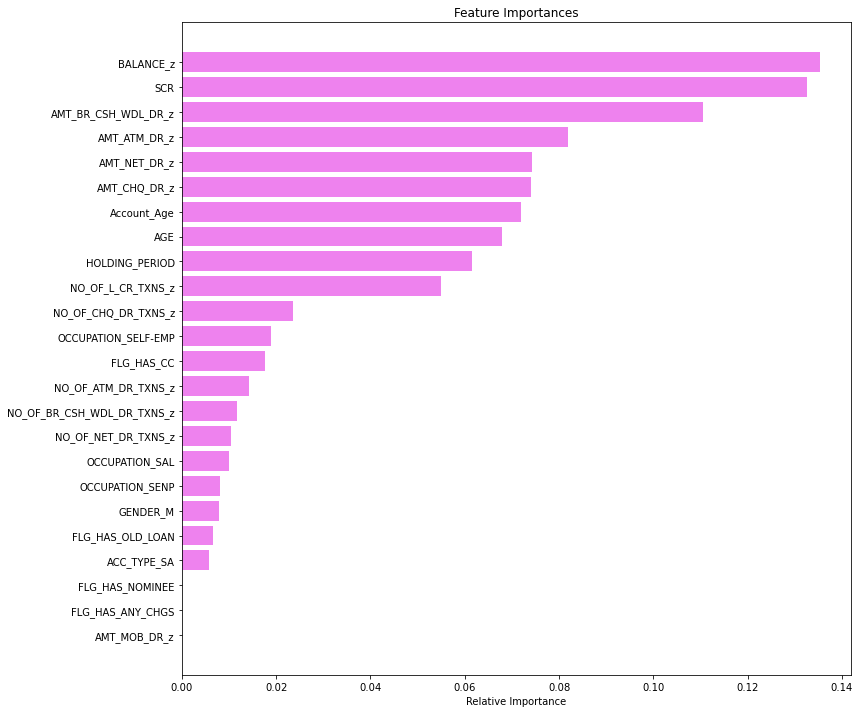

<IPython.core.display.Javascript object>

In [1029]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Balance, marketing score and amount cash withdrawn from Branch remain the top 3 important features for a successful model for this data set.

Comparing all the decision tree models

In [1030]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.939625,0.938990
Recall,1.0,0.739130,0.776812
Precision,1.0,0.718310,0.699739
F1,1.0,0.728571,0.736264


<IPython.core.display.Javascript object>

In [1035]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.938990,0.939625,0.938990
Recall,0.776812,0.739130,0.776812
Precision,0.699739,0.718310,0.699739
F1,0.736264,0.728571,0.736264


<IPython.core.display.Javascript object>

* While the decision tree with post-pruning produces identical metrics to the original decision tree model, it is simpler, making it the preferred model.

## Conclusions

### Reccomendations
My Bank and Best Insurance (Bancassurance) should target the folowing customers for loans:
* Customers with high balances
* Customers with a high marketing score 
* Customers who withdraw large amounts of cash from a branch 

